<a href="https://colab.research.google.com/github/adrija2706/EDA/blob/main/21BDS0061_EDA_THEORY_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***EDA THEORY DA***

# **GITHUB LINK** : https://github.com/adrija2706/EDA


# **MODULE 2**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Load the dataset**

In [ ]:
data_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/HepatitisCdata.csv"
data = pd.read_csv(data_url)

## **Display first 10 rows**

In [ ]:
print("First 10 rows of the dataset :")
print(data.head(10))

First 10 rows of the dataset :
   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   
5           6  0=Blood Donor   32   m  41.6  43.3  18.5  19.7  12.3   9.92   
6           7  0=Blood Donor   32   m  46.3  41.3  17.5  17.8   8.5   7.01   
7           8  0=Blood Donor   32   m  42.2  41.9  35.8  31.1  16.1   5.82   
8           9  0=Blood Donor   32   m  50.9  65.5  23.2  21.2   6.9   8.69   
9          10  0=Blood Donor   32   m  42.4  86.3  20.3  20.0  35.2   5.46   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  7

## **Check for NA values**

In [ ]:
print ("\nChecking for missing values: ")
print(data.isna().sum())


Checking for missing values: 
Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


## **Summary of missing values**

In [ ]:
total_na = data.isna().sum().sum()
print(f"\nTotal number of missing values: {total_na}")


Total number of missing values: 31


## **Count complete values in specific columns**

In [ ]:
columns_of_interest = ['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']
complete_values = data[columns_of_interest].notna().sum()
print("\nTotal complete values per column:")
print(complete_values)


Total complete values per column:
ALB     614
ALP     597
ALT     614
CHOL    605
PROT    614
dtype: int64


## **Count missing values proportionally per column**

In [ ]:
missing_proportion = data.isna().sum() / len(data) * 100
print("\nMissing values proportion per column:")
print(missing_proportion)



Missing values proportion per column:
Unnamed: 0    0.000000
Category      0.000000
Age           0.000000
Sex           0.000000
ALB           0.162602
ALP           2.926829
ALT           0.162602
AST           0.000000
BIL           0.000000
CHE           0.000000
CHOL          1.626016
CREA          0.000000
GGT           0.000000
PROT          0.162602
dtype: float64


## **Missing values visualization**

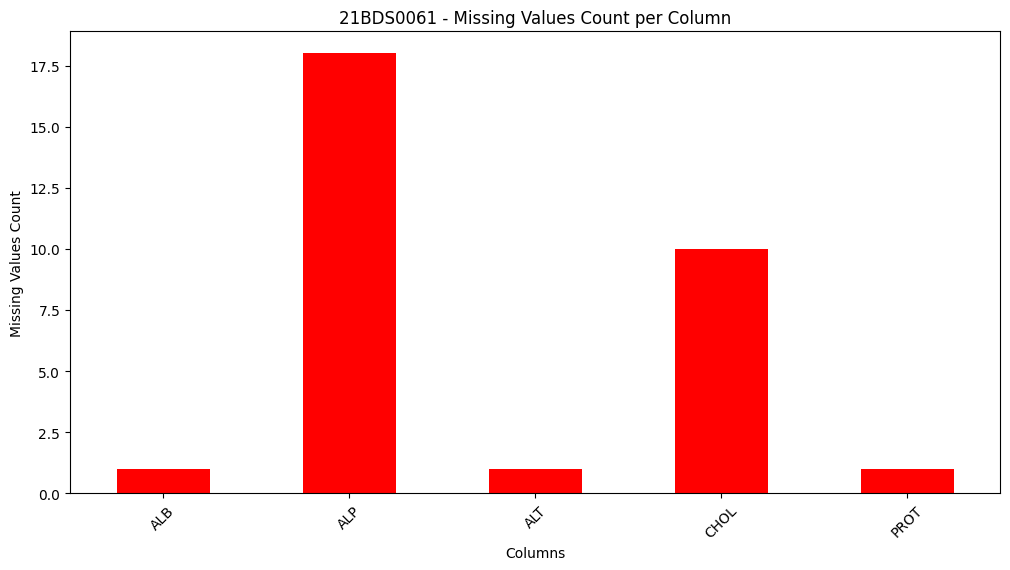

In [ ]:
plt.figure(figsize=(12, 6))
missing_counts = data.isna().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts.plot(kind='bar', color = 'red')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('21BDS0061 - Missing Values Count per Column')
plt.xticks(rotation=45)
plt.show()

## **Perform row-wise deletion (removing rows with missing values)**

In [ ]:
data_cleaned = data.dropna()
print("\nData after row-wise deletion:")
print(data_cleaned.head(10))


Data after row-wise deletion:
   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   
5           6  0=Blood Donor   32   m  41.6  43.3  18.5  19.7  12.3   9.92   
6           7  0=Blood Donor   32   m  46.3  41.3  17.5  17.8   8.5   7.01   
7           8  0=Blood Donor   32   m  42.2  41.9  35.8  31.1  16.1   5.82   
8           9  0=Blood Donor   32   m  50.9  65.5  23.2  21.2   6.9   8.69   
9          10  0=Blood Donor   32   m  42.4  86.3  20.3  20.0  35.2   5.46   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  7

## **Convert categorical columns to numeric**

In [ ]:
for col in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[col], _ = pd.factorize(data_cleaned[col])

## **Statistical Analysis**

In [ ]:
print("\nStatistical summary:")
print(data_cleaned.describe().T)
stats = data_cleaned.describe().T
stats["median"] = data_cleaned.median()
stats["std"] = data_cleaned.std()
stats["min"] = data_cleaned.min()
stats["max"] = data_cleaned.max()
stats["quantiles"] = data_cleaned.quantile([0.25, 0.5, 0.75]).T.values.tolist()

print("\nExtended Statistical Summary:")
print(stats)




Statistical summary:
            count        mean         std    min     25%     50%     75%  \
Unnamed: 0  589.0  298.648557  174.142507   1.00  149.00  296.00  448.00   
Category    589.0    0.303905    0.944552   0.00    0.00    0.00    0.00   
Age         589.0   47.417657    9.931334  23.00   39.00   47.00   54.00   
Sex         589.0    0.383701    0.486700   0.00    0.00    0.00    1.00   
ALB         589.0   41.624278    5.761794  14.90   38.80   41.90   45.10   
ALP         589.0   68.123090   25.921072  11.30   52.50   66.20   79.90   
ALT         589.0   26.575382   20.863120   0.90   16.40   22.70   31.90   
AST         589.0   33.772835   32.866871  10.60   21.50   25.70   31.70   
BIL         589.0   11.018166   17.406572   0.80    5.20    7.10   11.00   
CHE         589.0    8.203633    2.191073   1.42    6.93    8.26    9.57   
CHOL        589.0    5.391341    1.128954   1.43    4.62    5.31    6.08   
CREA        589.0   81.669100   50.696991   8.00   68.00   77.00  

# **Module 3**

## **Load the dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/HepatitisCdata.csv"
data = pd.read_csv(data_url)

## **Display the number of rows and columnns**

In [ ]:
print("Dataset Shape:", data.shape)

Dataset Shape: (615, 14)


## **Display the header or attribute names**

In [ ]:
print("Column Names:", data.columns.tolist())

Column Names: ['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


## **View the First and Last 10 rows of the dataset**

In [ ]:
print("First 10 rows of the dataset:")
print(data.head(10))

print("\nLast 10 rows of the dataset:")
print(data.tail(10))

First 10 rows of the dataset:
   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   
5           6  0=Blood Donor   32   m  41.6  43.3  18.5  19.7  12.3   9.92   
6           7  0=Blood Donor   32   m  46.3  41.3  17.5  17.8   8.5   7.01   
7           8  0=Blood Donor   32   m  42.2  41.9  35.8  31.1  16.1   5.82   
8           9  0=Blood Donor   32   m  50.9  65.5  23.2  21.2   6.9   8.69   
9          10  0=Blood Donor   32   m  42.4  86.3  20.3  20.0  35.2   5.46   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79

## **Delete the column 'BIL'**

In [ ]:
data.drop(columns = ['BIL'], inplace = True)
print("Column 'BIL' deleted.")

Column 'BIL' deleted.


## **Show the summary statistics**

In [ ]:
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
       Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.283920   28.450814   34.786341   
std    177.679487   10.055105    5.780629   26.028315   25.469689   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.500000   16.400000   21.600000   
50%    308.000000   47.000000   41.950000   66.200000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   80.100000   33.075000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              CHE        CHOL         CREA         GGT        PROT  
count  615.000000  605.000000   615.000000  615.000000  614.000000  
mean     8.196634    5.368099    81.287805   39.533171   72.044137  
std      2.205657    1.132728    49.756166 

## **Find the number of non-numeric values in specific columns**

In [ ]:
columns_to_check = ['ALB', 'ALT', 'AST', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
non_numeric_counts = data[columns_to_check].apply(lambda x: x.apply(lambda y: not isinstance(y, (int, float)))).sum()
print("\nNon-numeric values in specified columns:")
print(non_numeric_counts)


Non-numeric values in specified columns:
ALB     0
ALT     0
AST     0
CHE     0
CHOL    0
CREA    0
GGT     0
PROT    0
dtype: int64


## **Compute measures of central tendency for AST**

In [ ]:
print("Central Tendency of AST:")
print("Mean :",data['AST'].mean())
print("Median : ",data['AST'].median())
print("Mode : ",data['AST'].mode()[0])

Central Tendency of AST:
Mean : 34.78634146341463
Median :  25.9
Mode :  22.0


## **Compute measures of dispersion for AST**

In [ ]:
print("Dispersion of AST:")
print("Variance : ",data['AST'].var())
print("Standard Deviation : ",data['AST'].std())

Dispersion of AST:
Variance :  1094.9937870819103
Standard Deviation :  33.090690338551575


## **Compute quartile ranges and IQR for AST**

In [ ]:
q1 = data['AST'].quantile(0.25)
q2 = data['AST'].quantile(0.50)
q3 = data['AST'].quantile(0.75)
q4 = data['AST'].quantile(1.00)
iqr = q3 - q1
print("\nQuartiles and IQR for AST:")
print("Q1:", q1,"\n", "Q2:", q2,"\n", "Q3:", q3,"\n", "Q4:", q4, "\nIQR:", iqr)


Quartiles and IQR for AST:
Q1: 21.6 
 Q2: 25.9 
 Q3: 32.9 
 Q4: 324.0 
IQR: 11.299999999999997


## **Calculate correlation between CHOL and Age**

In [ ]:
print("Correlation between CHOL and Age:")
print(data['CHOL'].corr(data['Age']))

Correlation between CHOL and Age:
0.12564101435651298


## **Univariate Analysis**

### **Distribution plots for AST**

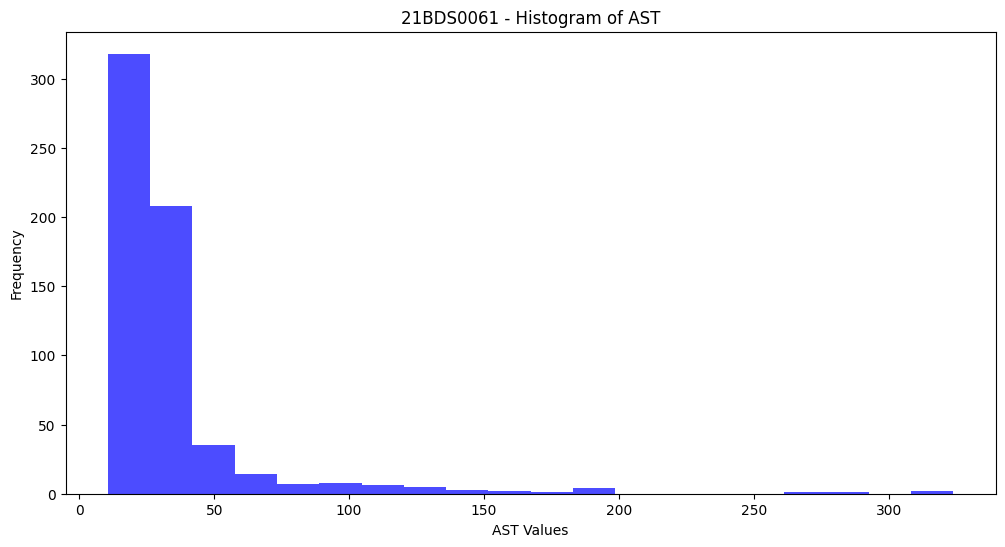

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data['AST'], bins=20, color='blue', alpha=0.7)
plt.title("21BDS0061 - Histogram of AST")
plt.xlabel("AST Values")
plt.ylabel("Frequency")
plt.show()

### **Density plots for AST**

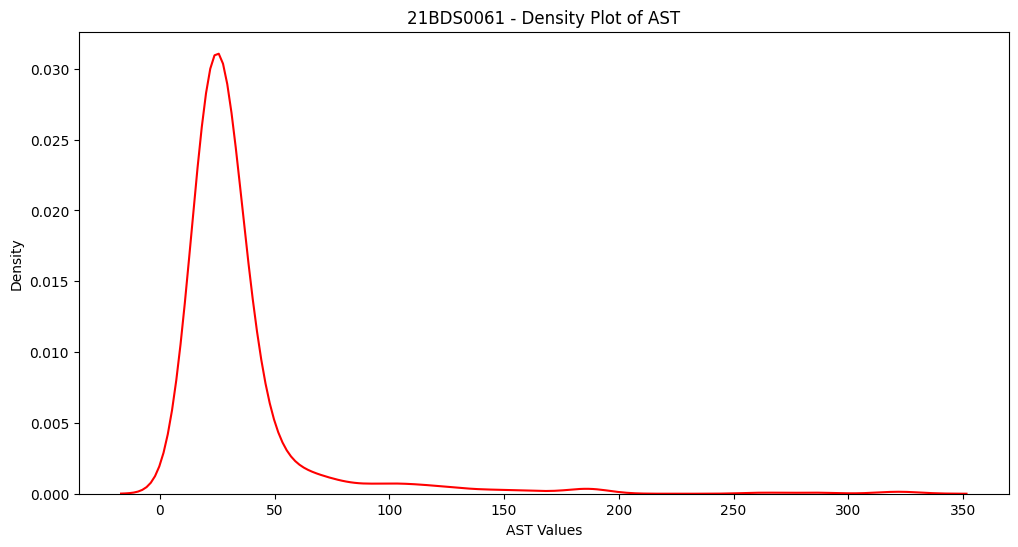

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data['AST'], color='red')
plt.title("21BDS0061 - Density Plot of AST")
plt.xlabel("AST Values")
plt.ylabel("Density")
plt.show()

### **Histogram and Density plots for AST**

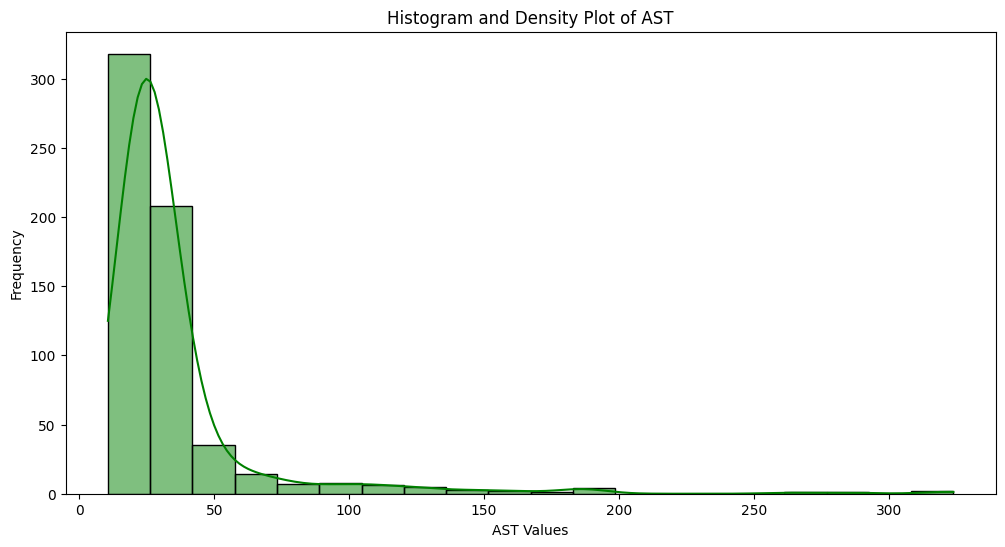

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['AST'], kde=True, bins=20, color='green')
plt.title("Histogram and Density Plot of AST")
plt.xlabel("AST Values")
plt.ylabel("Frequency")
plt.show()

### **Box plot for AST**

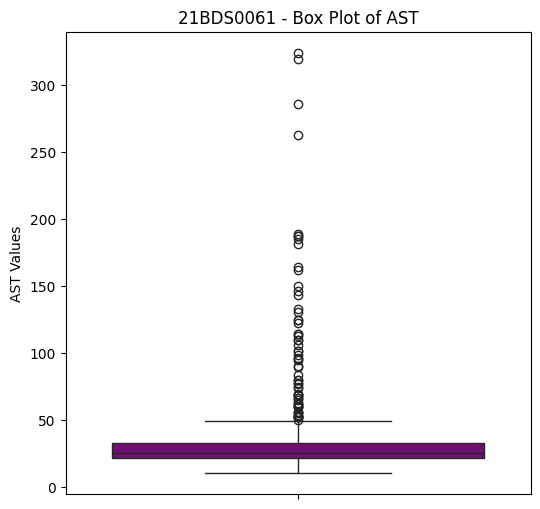

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=data['AST'], color='purple')
plt.title("21BDS0061 - Box Plot of AST")
plt.ylabel("AST Values")
plt.show()


### **Bar plot for 'Category' (vertical and horizontal)**

> Add blockquote



<ipython-input-17-6c2451e2a1b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=data, palette='viridis')


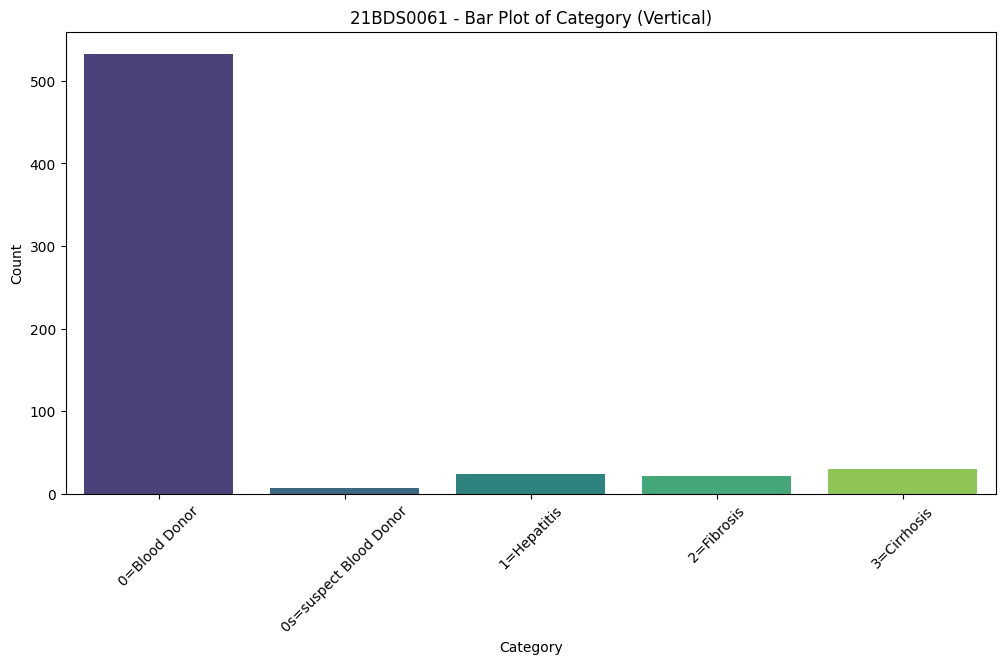

<ipython-input-17-6c2451e2a1b8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=data, palette='viridis')


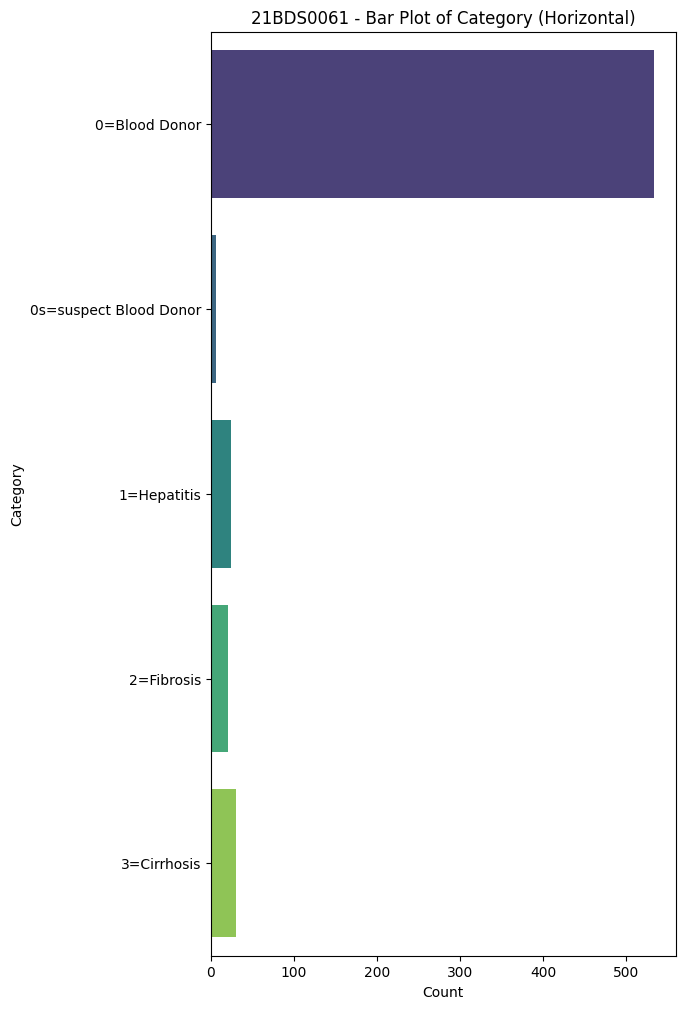

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=data, palette='viridis')
plt.title("21BDS0061 - Bar Plot of Category (Vertical)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 12))
sns.countplot(y='Category', data=data, palette='viridis')
plt.title("21BDS0061 - Bar Plot of Category (Horizontal)")
plt.ylabel("Category")
plt.xlabel("Count")
plt.show()

### **Pie plot for 'Category'**

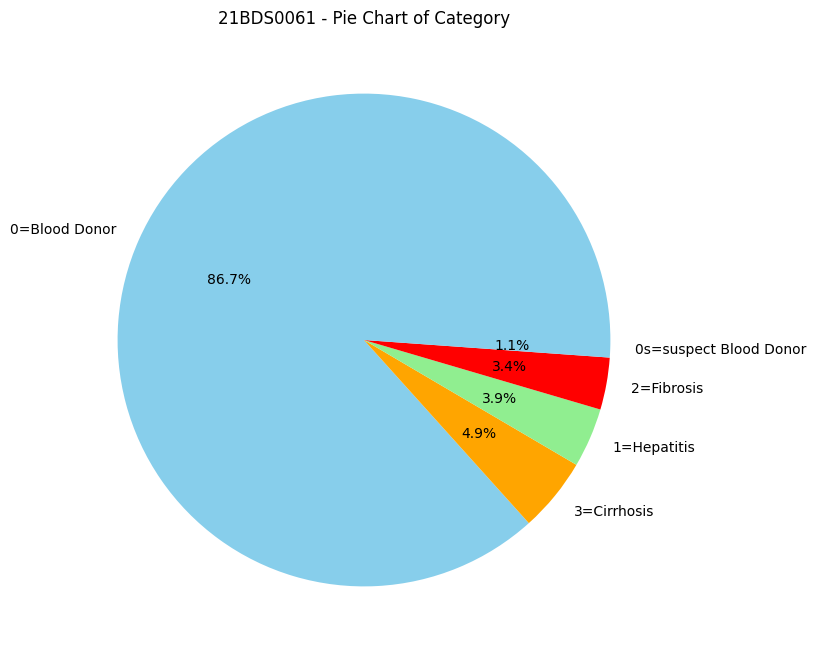

In [ ]:
data['Category'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), colors=['skyblue', 'orange', 'lightgreen', 'red'])
plt.title("21BDS0061 - Pie Chart of Category")
plt.ylabel("")
plt.show()

### **Dot plot for AST**

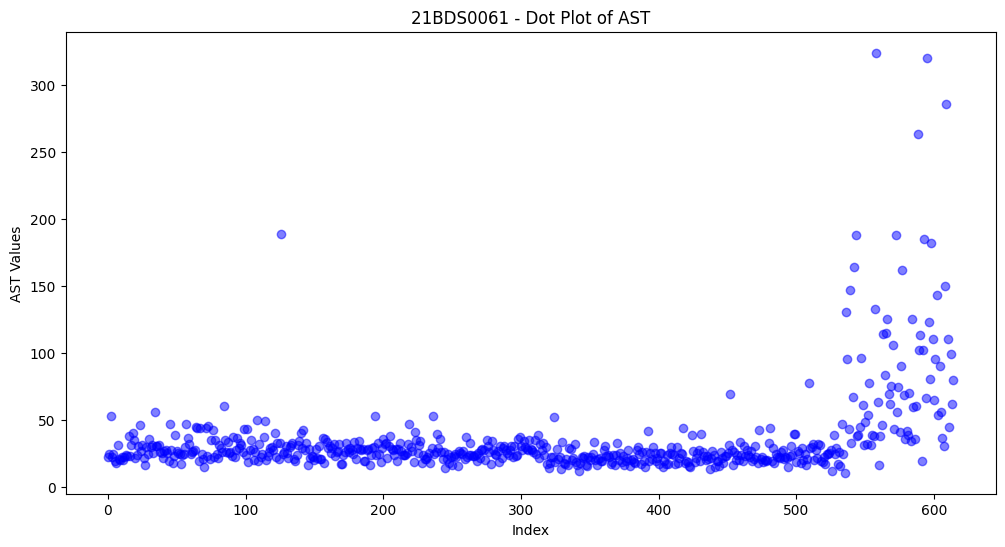

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['AST'], 'bo', alpha=0.5)
plt.title("21BDS0061 - Dot Plot of AST")
plt.xlabel("Index")
plt.ylabel("AST Values")
plt.show()


## **Bivariate Analysis**

### **Create a contingency table for "Category" and "Sex"**

In [ ]:
cont_table = pd.crosstab(data['Category'], data['Sex'])
print("Contingency Table:")
print(cont_table)

Contingency Table:
Sex                       f    m
Category                        
0=Blood Donor           215  318
0s=suspect Blood Donor    1    6
1=Hepatitis               4   20
2=Fibrosis                8   13
3=Cirrhosis              10   20


### **Categorical vs. Categorical**

#### **Stacked Bar Chart**

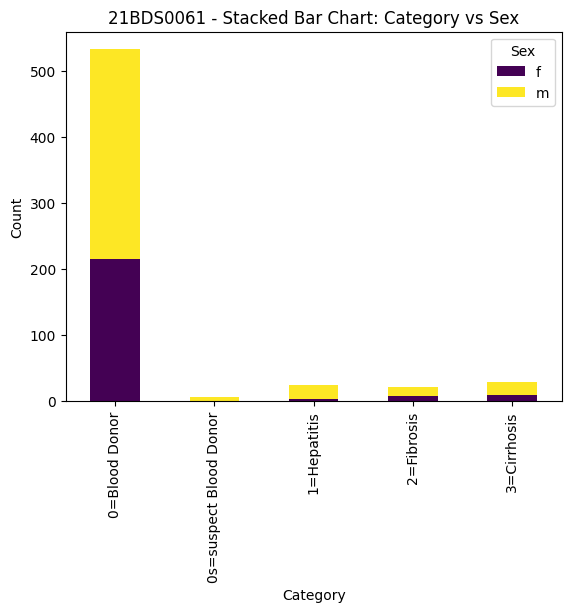

In [ ]:
cont_table.plot(kind="bar", stacked=True, colormap="viridis")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("21BDS0061 - Stacked Bar Chart: Category vs Sex")
plt.legend(title="Sex")
plt.show()

#### **Grouped Bar Plot (Side-by-side)**

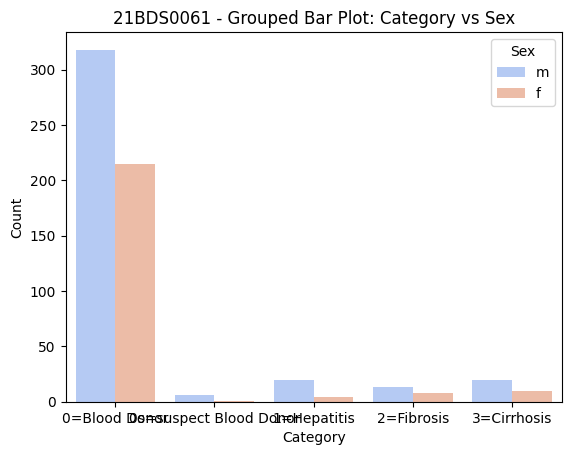

In [ ]:
sns.countplot(data=data, x="Category", hue="Sex", palette="coolwarm", dodge=True)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("21BDS0061 - Grouped Bar Plot: Category vs Sex")
plt.show()

### **Quantitative vs. Quantitative**

#### **Scatter Plot**

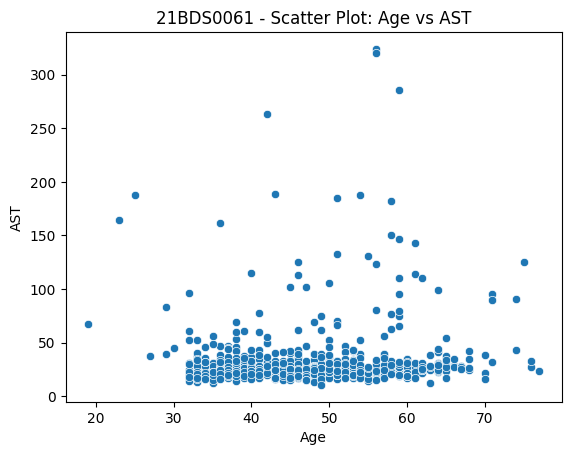

In [ ]:
sns.scatterplot(data = data, x = "Age", y = "AST")
plt.xlabel("Age")
plt.ylabel("AST")
plt.title("21BDS0061 - Scatter Plot: Age vs AST")
plt.show()

#### **Line Plot**

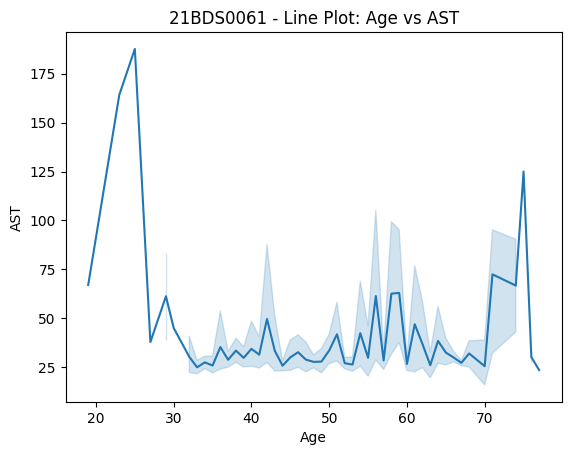

In [ ]:
sns.lineplot(data=data, x="Age", y="AST")
plt.xlabel("Age")
plt.ylabel("AST")
plt.title("21BDS0061 - Line Plot: Age vs AST")
plt.show()


#### **Heatmap (Correlation Matrix)**

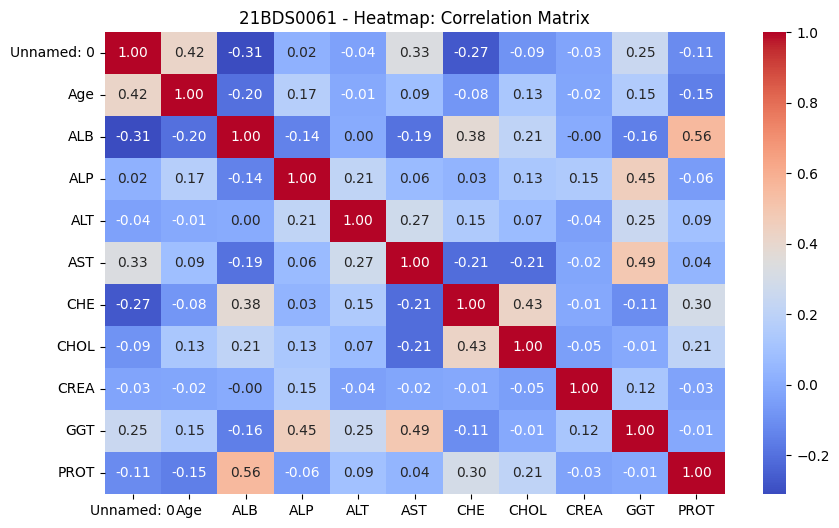

In [ ]:
corr_matrix = data.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("21BDS0061 - Heatmap: Correlation Matrix")
plt.show()

### **Categorical vs. Quantitative**

#### **Bar Chart**

<ipython-input-41-d89bb27d8343>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="Category", y="AST", estimator=np.mean, ci=None)


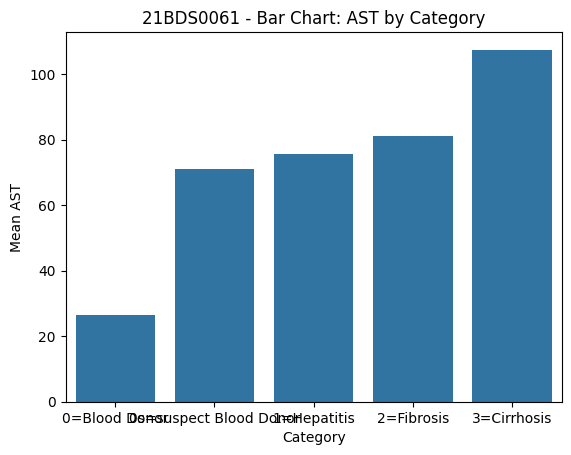

In [ ]:
sns.barplot(data=data, x="Category", y="AST", estimator=np.mean, ci=None)
plt.xlabel("Category")
plt.ylabel("Mean AST")
plt.title("21BDS0061 - Bar Chart: AST by Category")
plt.show()

#### **Density Plot**

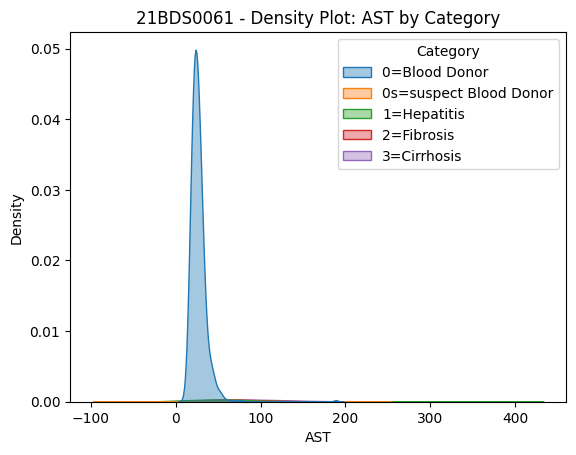

In [ ]:
sns.kdeplot(data=data, x="AST", hue="Category", fill=True, alpha=0.4)
plt.xlabel("AST")
plt.ylabel("Density")
plt.title("21BDS0061 - Density Plot: AST by Category")
plt.show()

#### **Box Plot**

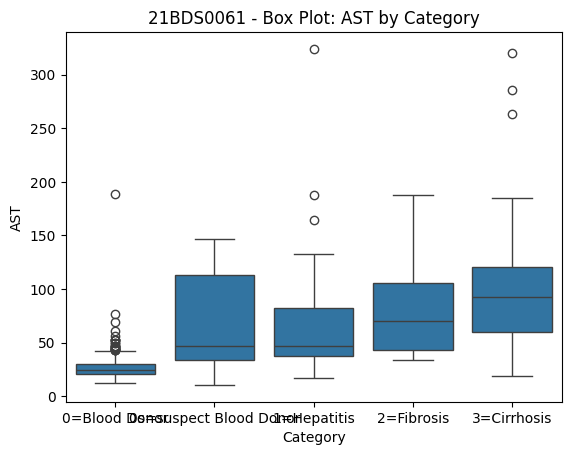

In [ ]:
sns.boxplot(data=data, x="Category", y="AST")
plt.xlabel("Category")
plt.ylabel("AST")
plt.title("21BDS0061 - Box Plot: AST by Category")
plt.show()


#### **Violin Plot**

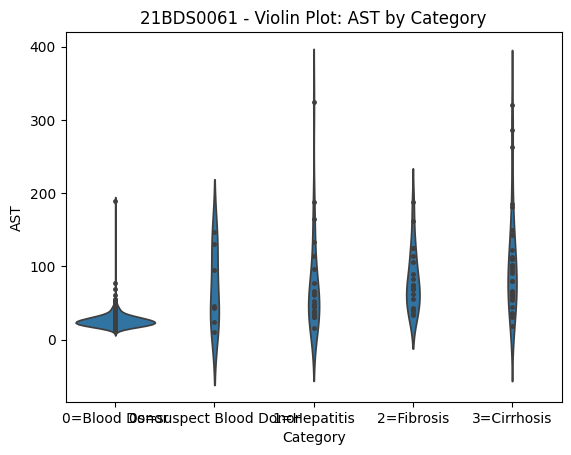

In [ ]:
sns.violinplot(data=data, x="Category", y="AST", inner="point")
plt.xlabel("Category")
plt.ylabel("AST")
plt.title("21BDS0061 - Violin Plot: AST by Category")
plt.show()

#### **Violin + Box Plot**

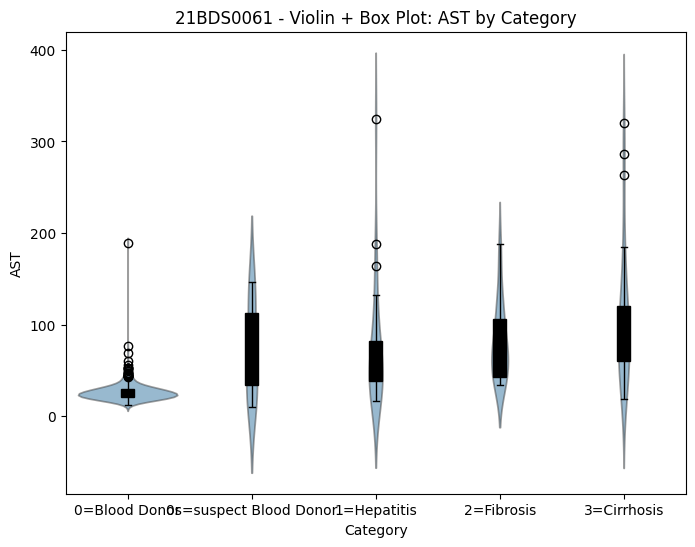

In [ ]:
plt.figure(figsize = (8, 6))
sns.violinplot(data = data, x = "Category", y = "AST", inner = None, alpha = 0.5)
sns.boxplot(data = data, x = "Category", y = "AST", width = 0.1, color = "black")
plt.xlabel("Category")
plt.ylabel("AST")
plt.title("21BDS0061 - Violin + Box Plot: AST by Category")
plt.show()

### **Multivariate Analysis**

#### **Scatter Plot**

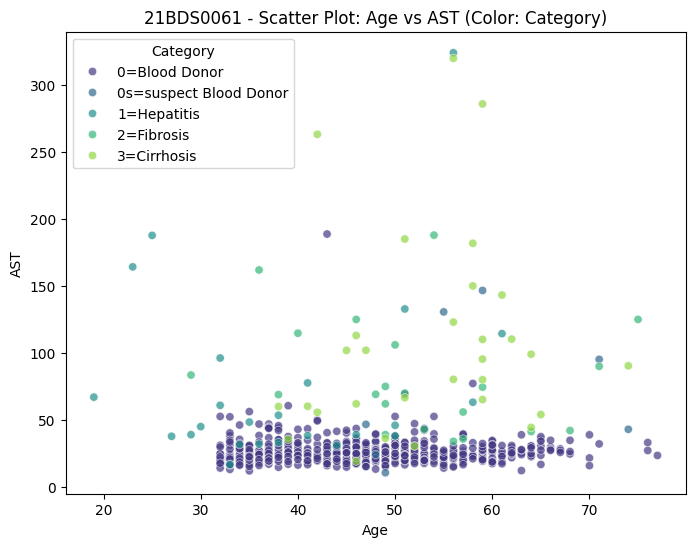

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Age", y="AST", hue="Category", palette="viridis", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("AST")
plt.title("21BDS0061 - Scatter Plot: Age vs AST (Color: Category)")
plt.legend(title="Category")
plt.show()

#### **Bubble Plot**

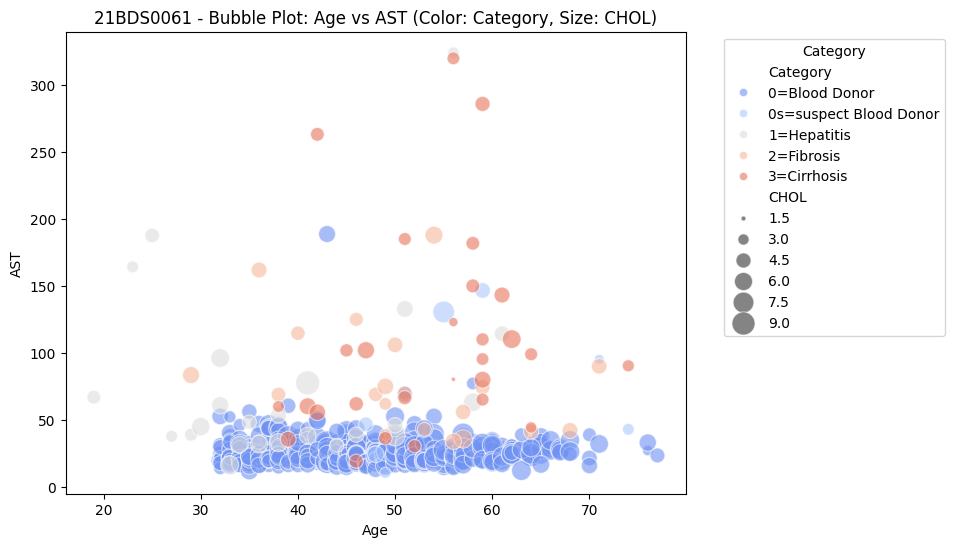

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Age", y="AST", hue="Category", size="CHOL", sizes=(10, 300), alpha=0.6, palette="coolwarm")
plt.xlabel("Age")
plt.ylabel("AST")
plt.title("21BDS0061 - Bubble Plot: Age vs AST (Color: Category, Size: CHOL)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


#### **Sub-Graph**

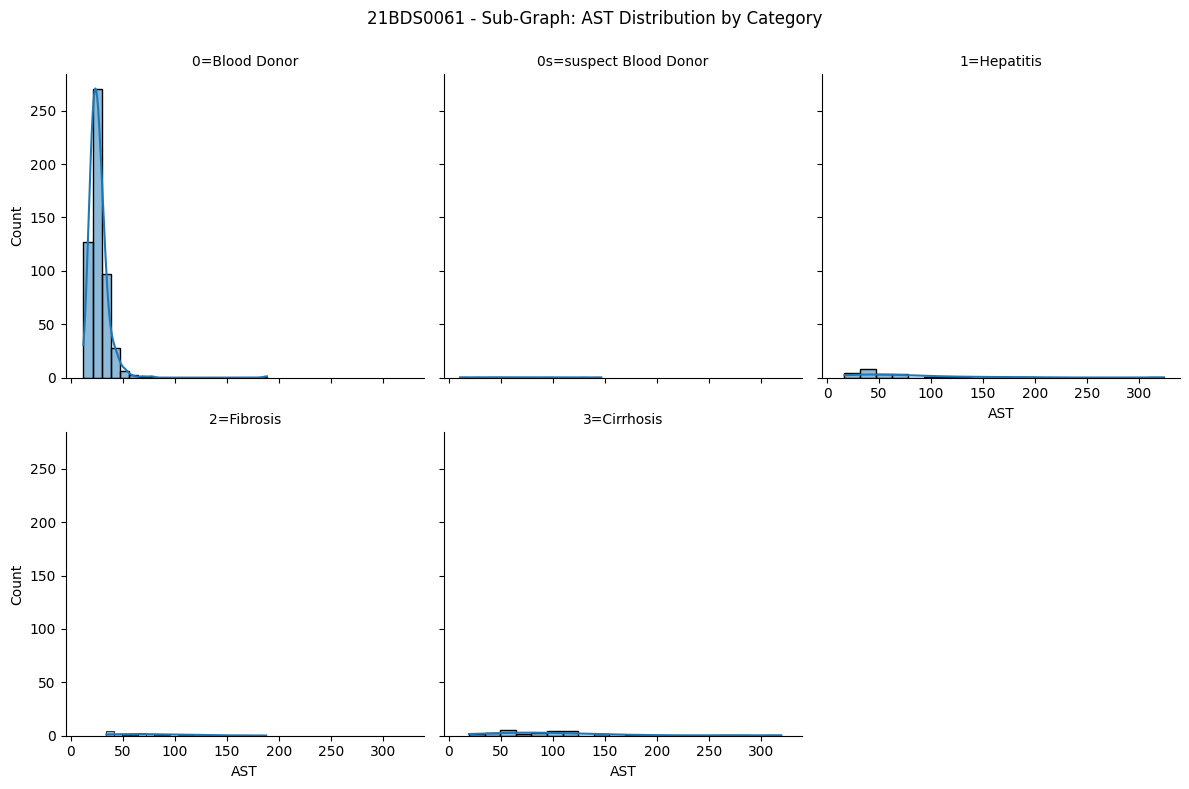

In [ ]:
g = sns.FacetGrid(data, col="Category", col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="AST", kde=True, bins=20)
g.set_titles("{col_name}")
g.set_axis_labels("AST", "Count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("21BDS0061 - Sub-Graph: AST Distribution by Category")
plt.show()

# **MODULE 4**

## **Load libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from plotnine import *
from scipy.stats import chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

## **Load Dataset**

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/HepatitisCdata.csv")
data.drop(columns = ['Unnamed: 0'], inplace = True)

# **Data Preprocessing**

In [ ]:
print ("\nChecking for missing values: ")
print(data.isna().sum())
total_na = data.isna().sum().sum()
print(f"\nTotal number of missing values: {total_na}")


Checking for missing values: 
Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

Total number of missing values: 31


In [ ]:
data_cleaned = data.dropna()
print("\nData after row-wise deletion:")
print(data_cleaned.head(10))


Data after row-wise deletion:
        Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA  \
0  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0   
1  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0   
2  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0   
3  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0   
4  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0   
5  0=Blood Donor   32   m  41.6  43.3  18.5  19.7  12.3   9.92  6.05  111.0   
6  0=Blood Donor   32   m  46.3  41.3  17.5  17.8   8.5   7.01  4.79   70.0   
7  0=Blood Donor   32   m  42.2  41.9  35.8  31.1  16.1   5.82  4.60  109.0   
8  0=Blood Donor   32   m  50.9  65.5  23.2  21.2   6.9   8.69  4.10   83.0   
9  0=Blood Donor   32   m  42.4  86.3  20.3  20.0  35.2   5.46  4.45   81.0   

    GGT  PROT  
0  12.1  69.0  
1  15.6  76.5  
2  33.2  79.3  
3  33.8  75.7  
4  29.9  68.7  
5  

## **1-D Statistical Analysis**

### **Measure of Central Tendency**

In [ ]:
for col in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[col], _ = pd.factorize(data_cleaned[col])

<ipython-input-22-b3f25b2f5a6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col], _ = pd.factorize(data_cleaned[col])
<ipython-input-22-b3f25b2f5a6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col], _ = pd.factorize(data_cleaned[col])


In [ ]:
print("\nStatistical summary:")
print(data_cleaned.describe().T)
stats = data_cleaned.describe().T
stats["median"] = data_cleaned.median()
stats["std"] = data_cleaned.std()
stats["min"] = data_cleaned.min()
stats["max"] = data_cleaned.max()
stats["quantiles"] = data_cleaned.quantile([0.25, 0.5, 0.75]).T.values.tolist()

print("\nExtended Statistical Summary:")
print(stats)


Statistical summary:
          count       mean        std    min    25%    50%    75%      max
Category  589.0   0.303905   0.944552   0.00   0.00   0.00   0.00     4.00
Age       589.0  47.417657   9.931334  23.00  39.00  47.00  54.00    77.00
Sex       589.0   0.383701   0.486700   0.00   0.00   0.00   1.00     1.00
ALB       589.0  41.624278   5.761794  14.90  38.80  41.90  45.10    82.20
ALP       589.0  68.123090  25.921072  11.30  52.50  66.20  79.90   416.60
ALT       589.0  26.575382  20.863120   0.90  16.40  22.70  31.90   325.30
AST       589.0  33.772835  32.866871  10.60  21.50  25.70  31.70   324.00
BIL       589.0  11.018166  17.406572   0.80   5.20   7.10  11.00   209.00
CHE       589.0   8.203633   2.191073   1.42   6.93   8.26   9.57    16.41
CHOL      589.0   5.391341   1.128954   1.43   4.62   5.31   6.08     9.67
CREA      589.0  81.669100  50.696991   8.00  68.00  77.00  89.00  1079.10
GGT       589.0  38.198472  54.302407   4.50  15.60  22.80  37.60   650.90
PRO

### **Measures of Dispersion**

In [ ]:
ranges = data_cleaned.max(numeric_only=True) - data_cleaned.min(numeric_only=True)
IQRs = data_cleaned.quantile(0.75) - data_cleaned.quantile(0.25)
stdevs = data_cleaned.std(numeric_only=True)
variances = data_cleaned.var(numeric_only=True)
skewness = data_cleaned.skew(numeric_only=True)
kurtosis = data_cleaned.kurtosis(numeric_only=True)

print("\nMeasures of Dispersion:")
print("Range:\n", ranges)
print("IQR:\n", IQRs)
print("Standard Deviation:\n", stdevs)
print("Variance:\n", variances)
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)


Measures of Dispersion:
Range:
 Category       4.00
Age           54.00
Sex            1.00
ALB           67.30
ALP          405.30
ALT          324.40
AST          313.40
BIL          208.20
CHE           14.99
CHOL           8.24
CREA        1071.10
GGT          646.40
PROT          41.70
dtype: float64
IQR:
 Category     0.00
Age         15.00
Sex          1.00
ALB          6.30
ALP         27.40
ALT         15.50
AST         10.20
BIL          5.80
CHE          2.64
CHOL         1.46
CREA        21.00
GGT         22.00
PROT         5.90
dtype: float64
Standard Deviation:
 Category     0.944552
Age          9.931334
Sex          0.486700
ALB          5.761794
ALP         25.921072
ALT         20.863120
AST         32.866871
BIL         17.406572
CHE          2.191073
CHOL         1.128954
CREA        50.696991
GGT         54.302407
PROT         5.348883
dtype: float64
Variance:
 Category       0.892179
Age           98.631388
Sex            0.236877
ALB           33.198270
ALP     

### **Frequency Distribution and Plots**

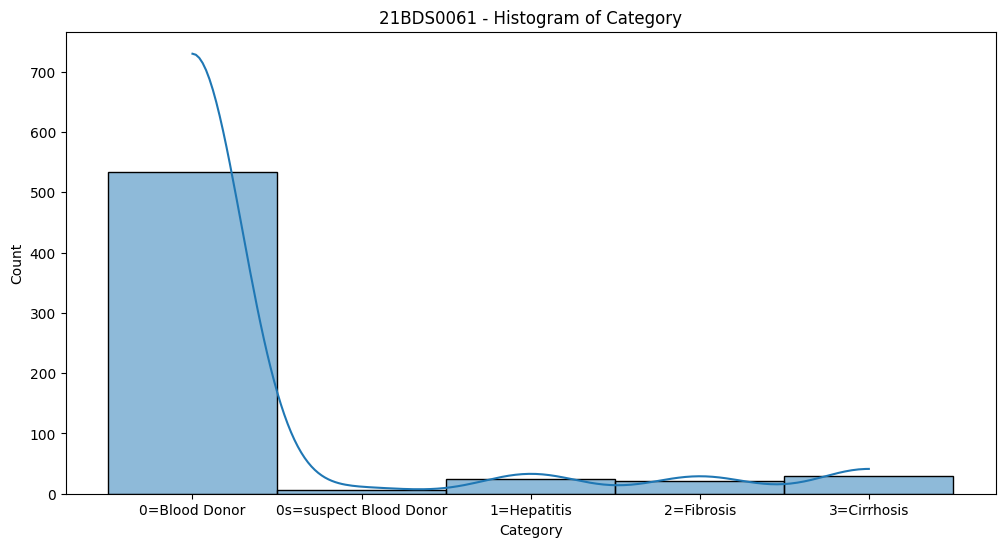

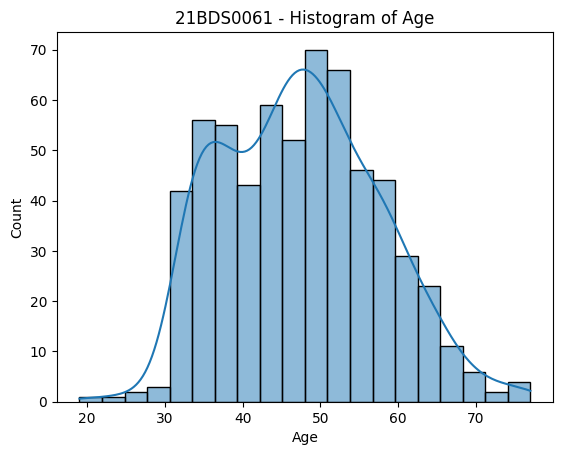

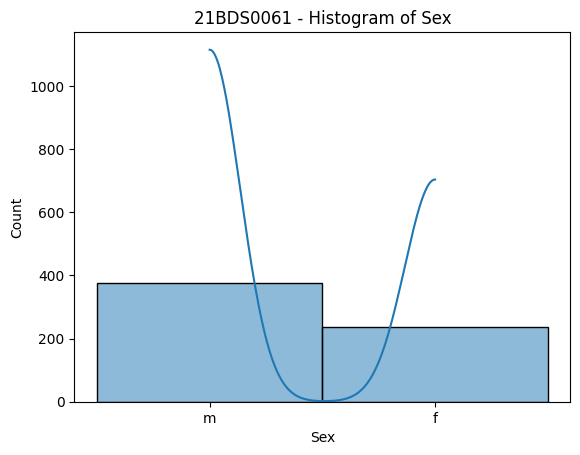

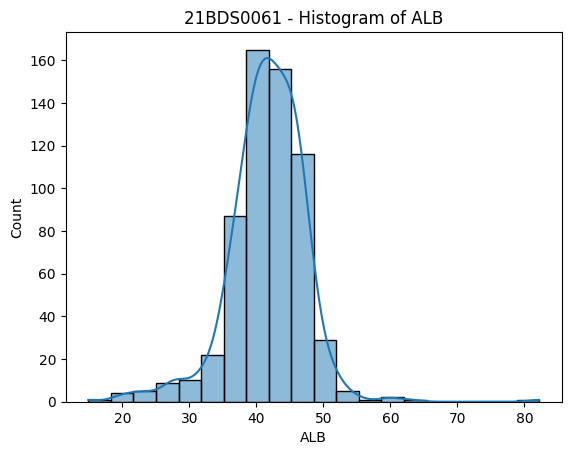

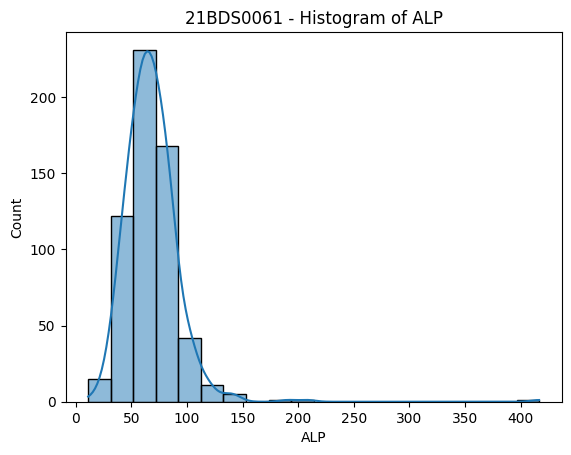

In [ ]:
numeric_cols = data_cleaned.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 6))
for col in numeric_cols[:5]:
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'21BDS0061 - Histogram of {col}')
    plt.show()

### **Categorical Variable Visualization**

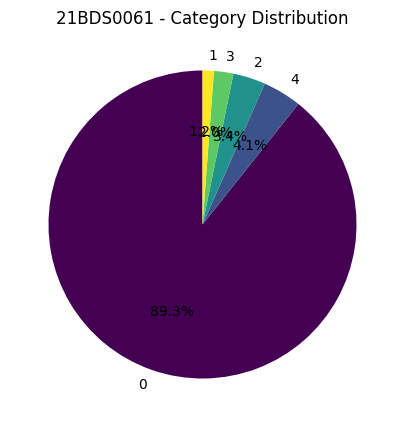

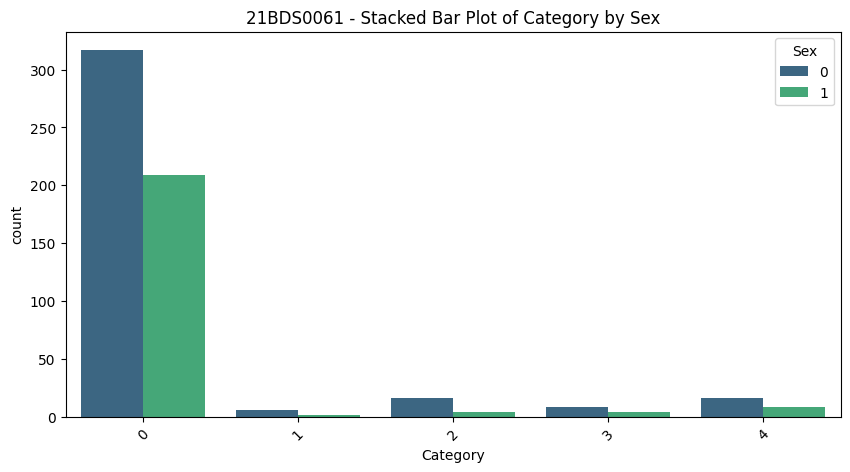

In [ ]:
plt.figure(figsize=(8, 5))
data_cleaned['Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title("21BDS0061 - Category Distribution")
plt.ylabel('')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Category', hue='Sex', data=data_cleaned, palette='viridis')
plt.title("21BDS0061 - Stacked Bar Plot of Category by Sex")
plt.xticks(rotation=45)
plt.show()

## **2-D Statistical Analysis**

### **Separate categorical and numerical columns**

In [ ]:
categorical_cols = ['Category', 'Sex']
numerical_cols = [col for col in data_cleaned.columns if col not in categorical_cols]

### **2-Way Contingency Table**

In [ ]:
contingency_tables = {}

#### **Categorical-Categorical**


2-way contingency table for Category vs Sex:
Sex                       f    m
Category                        
0=Blood Donor           209  317
0s=suspect Blood Donor    1    6
1=Hepatitis               4   16
2=Fibrosis                4    8
3=Cirrhosis               8   16


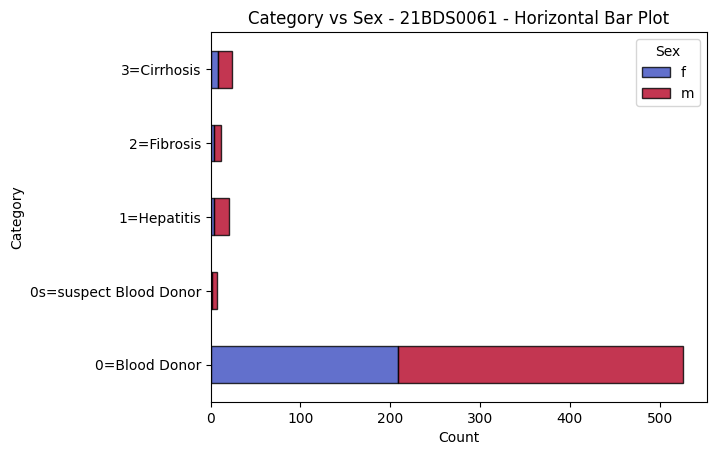


2-way contingency table for Sex vs Category:
Category  0=Blood Donor  0s=suspect Blood Donor  1=Hepatitis  2=Fibrosis  \
Sex                                                                        
f                   209                       1            4           4   
m                   317                       6           16           8   

Category  3=Cirrhosis  
Sex                    
f                   8  
m                  16  


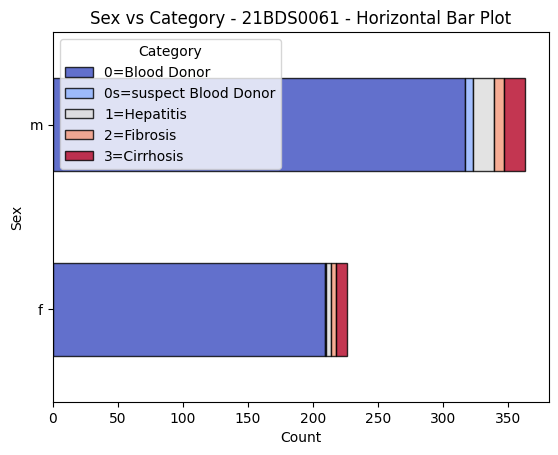

In [ ]:
for cat1 in categorical_cols:
    for cat2 in categorical_cols:
        if cat1 != cat2:
            key = f"{cat1} vs {cat2}"
            contingency_tables[key] = pd.crosstab(data_cleaned[cat1], data_cleaned[cat2])
            print(f"\n2-way contingency table for {key}:")
            print(contingency_tables[key])

            contingency_tables[key].plot(kind='barh', stacked=True, colormap='coolwarm', edgecolor='black', alpha=0.8)
            plt.title(f"{key} - 21BDS0061 - Horizontal Bar Plot")
            plt.xlabel("Count")
            plt.ylabel(cat1)
            plt.legend(title=cat2)
            plt.show()


#### **Numerical-Numerical (Correlation Matrix)**




Numerical-Numerical (Correlation Matrix):
           Age       ALB       ALP       ALT       AST       BIL       CHE  \
Age   1.000000 -0.191094  0.177720 -0.040576  0.072739  0.039655 -0.075863   
ALB  -0.191094  1.000000 -0.146120  0.039497 -0.177609 -0.169597  0.360919   
ALP   0.177720 -0.146120  1.000000  0.221603  0.067024  0.058372  0.029482   
ALT  -0.040576  0.039497  0.221603  1.000000  0.198658 -0.106797  0.224344   
AST   0.072739 -0.177609  0.067024  0.198658  1.000000  0.309580 -0.197270   
BIL   0.039655 -0.169597  0.058372 -0.106797  0.309580  1.000000 -0.320713   
CHE  -0.075863  0.360919  0.029482  0.224344 -0.197270 -0.320713  1.000000   
CHOL  0.124742  0.210420  0.125900  0.149997 -0.201213 -0.181570  0.428018   
CREA -0.025142  0.001433  0.153909 -0.036106 -0.017948  0.019910 -0.012120   
GGT   0.143379 -0.147598  0.461300  0.219707  0.477774  0.210567 -0.095716   
PROT -0.159760  0.570726 -0.063085  0.016786  0.017404 -0.052575  0.306288   

          CHOL      

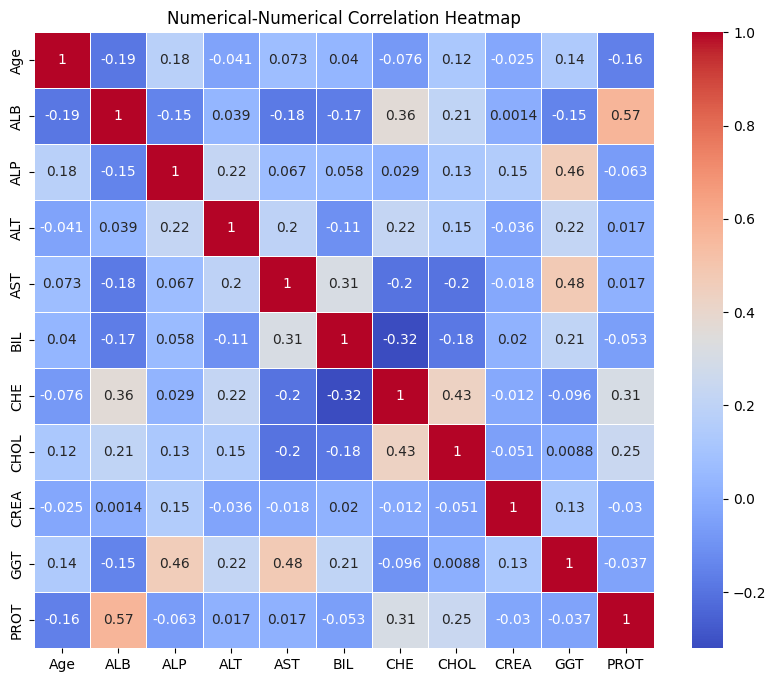

In [ ]:
numerical_contingency = data_cleaned[numerical_cols].corr()
print("\nNumerical-Numerical (Correlation Matrix):")
print(numerical_contingency)

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_contingency, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Numerical-Numerical Correlation Heatmap")
plt.show()


#### **Categorical-Numerical (Grouped Statistics)**


Categorical-Numerical statistics for Category vs Age:
                        count       mean        std   min    25%   50%    75%  \
Category                                                                        
0=Blood Donor           526.0  47.174905   9.633662  32.0  39.00  47.0  53.75   
0s=suspect Blood Donor    7.0  57.571429  11.073349  47.0  48.50  55.0  65.00   
1=Hepatitis              20.0  40.650000  11.070468  23.0  32.75  39.5  50.00   
2=Fibrosis               12.0  49.666667  12.115605  29.0  39.50  51.0  57.50   
3=Cirrhosis              24.0  54.291667   8.670185  39.0  48.25  56.0  59.00   

                         max  
Category                      
0=Blood Donor           77.0  
0s=suspect Blood Donor  74.0  
1=Hepatitis             61.0  
2=Fibrosis              68.0  
3=Cirrhosis             74.0  


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



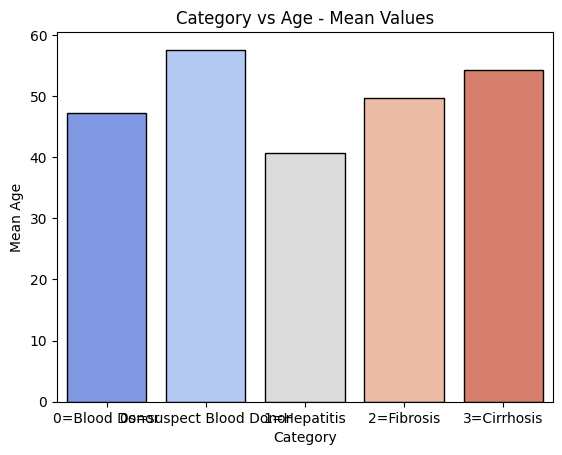


Categorical-Numerical statistics for Category vs ALB:
                        count       mean        std   min    25%   50%    75%  \
Category                                                                        
0=Blood Donor           526.0  42.188023   5.042039  26.2  39.20  42.1  45.30   
0s=suspect Blood Donor    7.0  24.400000  10.560776  14.9  19.80  21.6  23.70   
1=Hepatitis              20.0  43.600000   3.589458  37.0  41.75  43.0  46.25   
2=Fibrosis               12.0  43.000000   3.357488  38.0  40.75  43.0  45.25   
3=Cirrhosis              24.0  31.958333   4.885464  23.0  29.00  32.5  35.25   

                         max  
Category                      
0=Blood Donor           82.2  
0s=suspect Blood Donor  47.3  
1=Hepatitis             50.0  
2=Fibrosis              49.0  
3=Cirrhosis             39.0  


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



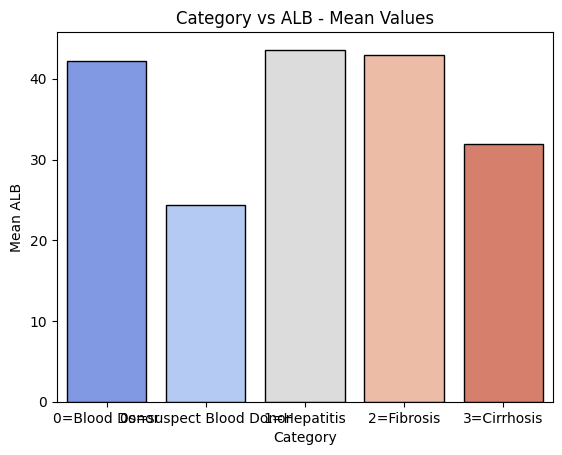


Categorical-Numerical statistics for Category vs ALP:
                        count        mean        std   min     25%     50%  \
Category                                                                     
0=Blood Donor           526.0   68.163308  17.899564  27.0  55.425   66.60   
0s=suspect Blood Donor    7.0  107.300000  52.821555  42.2  76.900  106.00   
1=Hepatitis              20.0   41.405000  23.897335  19.1  30.800   34.50   
2=Fibrosis               12.0   37.841667   8.308753  22.9  33.300   39.55   
3=Cirrhosis              24.0   93.220833  80.048284  11.3  48.875   80.05   

                            75%    max  
Category                                
0=Blood Donor            79.300  145.0  
0s=suspect Blood Donor  120.450  208.2  
1=Hepatitis              38.550  114.0  
2=Fibrosis               43.100   52.1  
3=Cirrhosis             103.575  416.6  


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



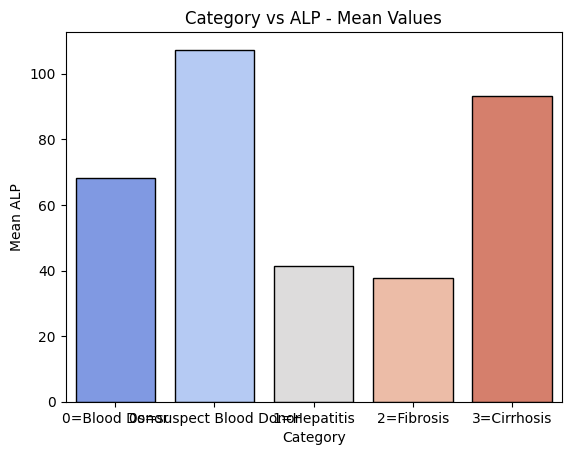


Categorical-Numerical statistics for Category vs ALT:
                        count        mean         std  min    25%    50%  \
Category                                                                   
0=Blood Donor           526.0   26.803612   14.500350  7.0  17.30  23.25   
0s=suspect Blood Donor    7.0  102.114286  119.836909  9.5  21.25  49.20   
1=Hepatitis              20.0   20.635000   15.600617  3.8  10.00  12.75   
2=Fibrosis               12.0   19.300000   18.543904  2.4   8.00  12.55   
3=Cirrhosis              24.0    8.129167    8.082105  0.9   3.35   4.95   

                            75%    max  
Category                                
0=Blood Donor            32.550  118.1  
0s=suspect Blood Donor  144.150  325.3  
1=Hepatitis              27.500   63.3  
2=Fibrosis               23.275   67.1  
3=Cirrhosis               9.050   29.6  


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



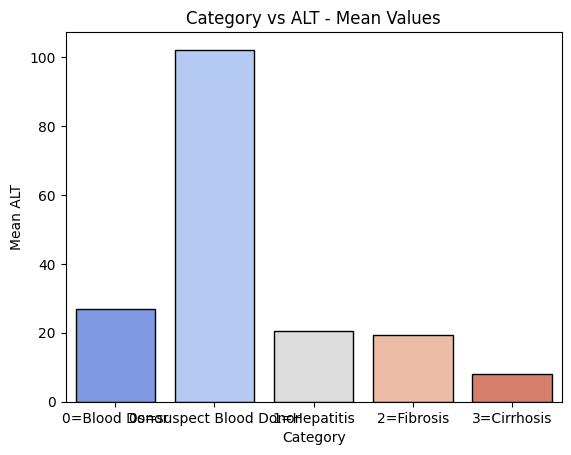


Categorical-Numerical statistics for Category vs AST:
                        count        mean        std   min     25%    50%  \
Category                                                                    
0=Blood Donor           526.0   26.517871  10.615871  12.0  21.125  24.80   
0s=suspect Blood Donor    7.0   71.000000  53.317758  10.6  33.650  46.70   
1=Hepatitis              20.0   81.675000  73.953427  16.7  38.025  50.95   
2=Fibrosis               12.0   88.383333  49.072133  35.8  52.450  71.80   
3=Cirrhosis              24.0  114.695833  81.379415  19.2  59.075  97.20   

                            75%    max  
Category                                
0=Blood Donor            29.750  188.7  
0s=suspect Blood Donor  112.900  146.6  
1=Hepatitis             100.750  324.0  
2=Fibrosis              117.275  187.9  
3=Cirrhosis             144.900  319.8  


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



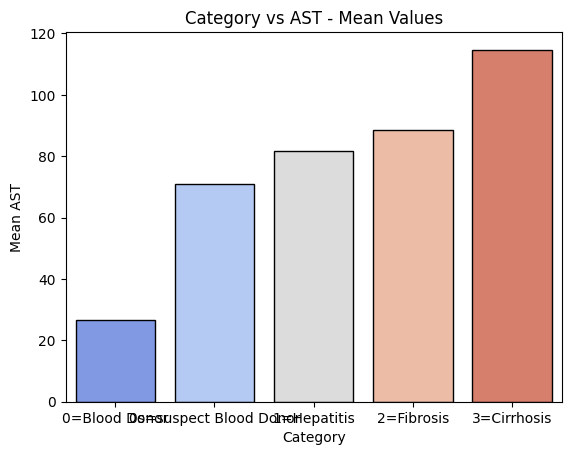


Categorical-Numerical statistics for Category vs BIL:
                        count       mean        std  min    25%   50%    75%  \
Category                                                                       
0=Blood Donor           526.0   8.570152   6.102574  1.8   5.10   6.9  10.10   
0s=suspect Blood Donor    7.0   4.685714   3.113106  0.8   2.35   4.9   6.30   
1=Hepatitis              20.0  16.350000  14.636922  5.0   7.75  13.0  17.00   
2=Fibrosis               12.0  14.166667   6.644661  6.0  11.00  12.5  17.25   
3=Cirrhosis              24.0  60.500000  62.938203  7.0  19.75  38.5  66.25   

                          max  
Category                       
0=Blood Donor            59.1  
0s=suspect Blood Donor    9.8  
1=Hepatitis              67.0  
2=Fibrosis               30.0  
3=Cirrhosis             209.0  


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



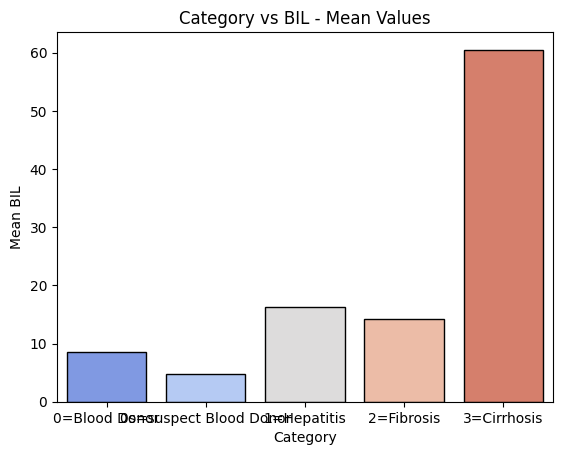


Categorical-Numerical statistics for Category vs CHE:
                        count      mean       std   min     25%    50%  \
Category                                                                 
0=Blood Donor           526.0  8.386464  1.881908  3.90  7.1000  8.325   
0s=suspect Blood Donor    7.0  7.480000  4.642901  3.44  4.3300  5.330   
1=Hepatitis              20.0  9.236500  2.644013  5.75  7.0875  9.510   
2=Fibrosis               12.0  8.440833  1.401074  6.60  7.2425  8.570   
3=Cirrhosis              24.0  3.428333  1.969773  1.42  1.7825  2.485   

                            75%    max  
Category                                
0=Blood Donor            9.6000  15.43  
0s=suspect Blood Donor  10.0650  14.80  
1=Hepatitis             10.1475  16.41  
2=Fibrosis               9.2925  11.49  
3=Cirrhosis              5.4275   7.10  


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



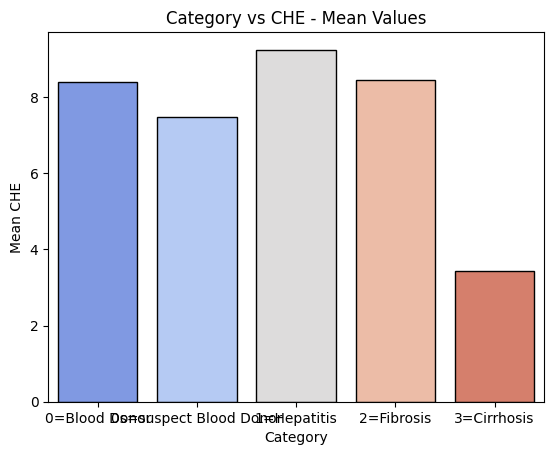


Categorical-Numerical statistics for Category vs CHOL:
                        count      mean       std   min     25%    50%  \
Category                                                                 
0=Blood Donor           526.0  5.494316  1.059464  2.79  4.6950  5.405   
0s=suspect Blood Donor    7.0  4.451429  1.869005  2.61  3.1000  4.300   
1=Hepatitis              20.0  5.139000  1.499919  3.09  4.2450  5.060   
2=Fibrosis               12.0  4.792500  0.688452  4.01  4.2875  4.580   
3=Cirrhosis              24.0  3.918333  0.973642  1.43  3.5850  3.800   

                           75%   max  
Category                              
0=Blood Donor           6.1700  9.43  
0s=suspect Blood Donor  4.9850  8.08  
1=Hepatitis             5.7225  9.67  
2=Fibrosis              5.0225  6.19  
3=Cirrhosis             4.2025  6.30  


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



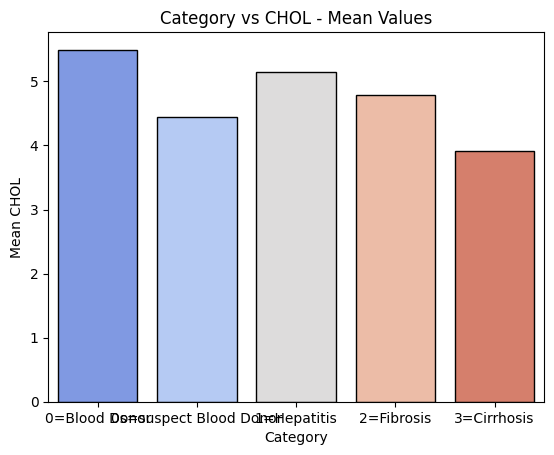


Categorical-Numerical statistics for Category vs CREA:
                        count        mean         std   min     25%    50%  \
Category                                                                     
0=Blood Donor           526.0   79.159696   14.436105   8.0  69.000  78.00   
0s=suspect Blood Donor    7.0   61.714286   52.854247   9.0  30.500  52.00   
1=Hepatitis              20.0   73.505000   21.341866  45.4  60.300  68.90   
2=Fibrosis               12.0   69.858333    9.791783  55.2  63.875  70.45   
3=Cirrhosis              24.0  155.195833  231.867004  49.6  62.150  72.00   

                            75%     max  
Category                                 
0=Blood Donor            89.000   127.0  
0s=suspect Blood Donor   70.000   170.0  
1=Hepatitis              81.275   147.3  
2=Fibrosis               72.725    91.0  
3=Cirrhosis             109.350  1079.1  


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



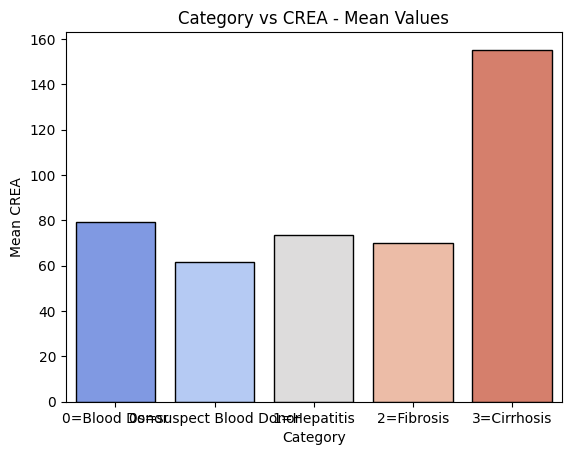


Categorical-Numerical statistics for Category vs GGT:
                        count        mean         std   min     25%    50%  \
Category                                                                     
0=Blood Donor           526.0   29.097909   24.882882   4.5  15.100  21.30   
0s=suspect Blood Donor    7.0  151.514286  133.768512   7.6  55.250  83.00   
1=Hepatitis              20.0  102.900000  125.488276  11.5  34.075  53.00   
2=Fibrosis               12.0   68.383333   39.169349  11.9  37.175  64.80   
3=Cirrhosis              24.0  135.591667  151.745207  17.6  48.975  79.65   

                            75%    max  
Category                                
0=Blood Donor            32.075  239.0  
0s=suspect Blood Donor  256.950  345.6  
1=Hepatitis             104.925  491.0  
2=Fibrosis               97.700  130.0  
3=Cirrhosis             143.450  650.9  


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



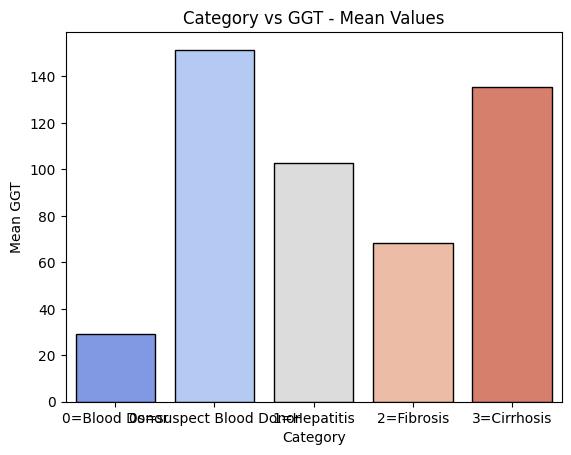


Categorical-Numerical statistics for Category vs PROT:
                        count       mean        std   min     25%    50%  \
Category                                                                   
0=Blood Donor           526.0  72.096008   4.572235  51.0  69.300  72.10   
0s=suspect Blood Donor    7.0  53.914286  11.711309  44.8  47.400  47.80   
1=Hepatitis              20.0  74.390000   4.983541  65.6  71.050  72.75   
2=Fibrosis               12.0  74.841667   5.423427  66.5  71.650  75.00   
3=Cirrhosis              24.0  69.062500   8.139320  54.2  62.675  69.50   

                          75%   max  
Category                             
0=Blood Donor           75.20  86.5  
0s=suspect Blood Donor  55.85  78.3  
1=Hepatitis             76.85  86.0  
2=Fibrosis              79.55  82.0  
3=Cirrhosis             73.75  82.7  


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



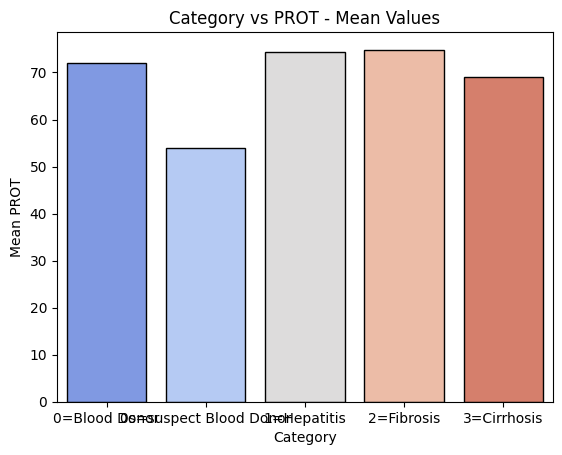


Categorical-Numerical statistics for Sex vs Age:
     count       mean        std   min   25%   50%   75%   max
Sex                                                           
f    226.0  47.597345   9.063813  32.0  41.0  48.0  54.0  70.0
m    363.0  47.305785  10.445737  23.0  39.0  47.0  55.0  77.0


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



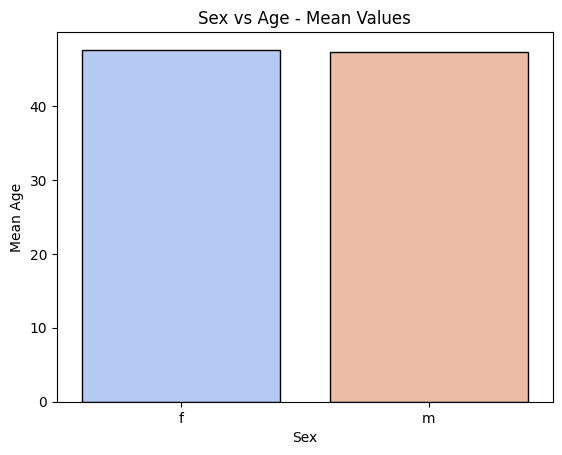


Categorical-Numerical statistics for Sex vs ALB:
     count       mean       std   min     25%   50%   75%   max
Sex                                                            
f    226.0  40.529204  5.262854  19.3  37.825  40.1  43.4  62.9
m    363.0  42.306061  5.957693  14.9  39.650  42.9  45.9  82.2


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



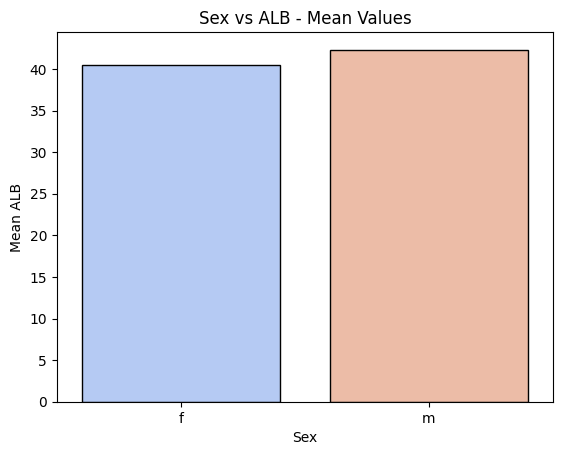


Categorical-Numerical statistics for Sex vs ALP:
     count       mean        std   min     25%   50%    75%    max
Sex                                                               
f    226.0  68.372566  32.420465  22.9  52.125  63.8  80.20  416.6
m    363.0  67.967769  20.928783  11.3  53.600  66.7  79.75  145.0


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



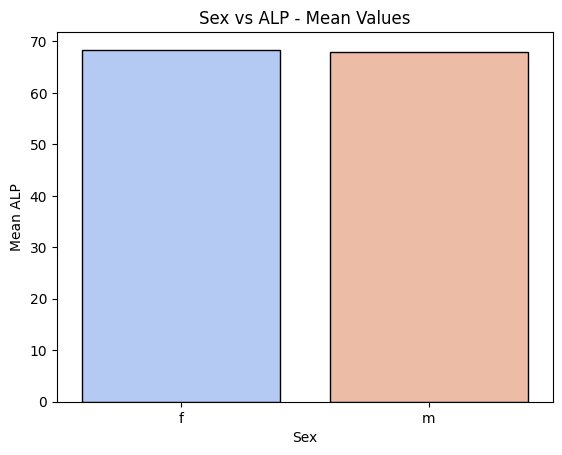


Categorical-Numerical statistics for Sex vs ALT:
     count      mean        std  min    25%   50%    75%    max
Sex                                                            
f    226.0  21.89646  22.906645  1.2  14.35  18.3  24.15  325.3
m    363.0  29.48843  18.939411  0.9  18.60  26.1  35.80  208.8


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



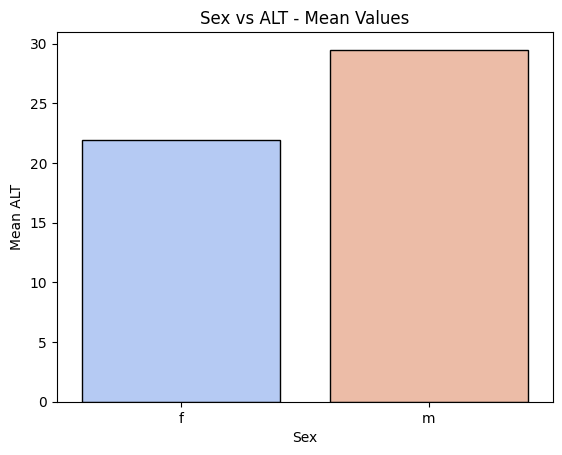


Categorical-Numerical statistics for Sex vs AST:


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



     count       mean        std   min   25%    50%    75%    max
Sex                                                              
f    226.0  28.367257  26.079475  12.0  19.2  22.45  27.70  285.8
m    363.0  37.138292  36.087273  10.6  23.6  27.60  34.35  324.0


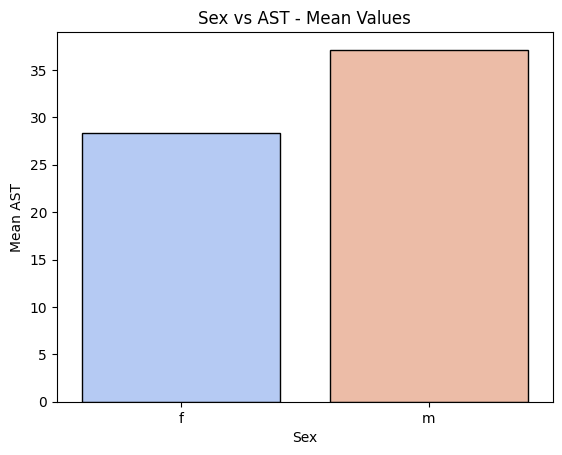


Categorical-Numerical statistics for Sex vs BIL:
     count       mean        std  min   25%   50%   75%    max
Sex                                                           
f    226.0   8.636283  14.524903  1.8  4.30  6.05   8.4  200.0
m    363.0  12.501102  18.848629  0.8  5.95  7.90  12.9  209.0


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



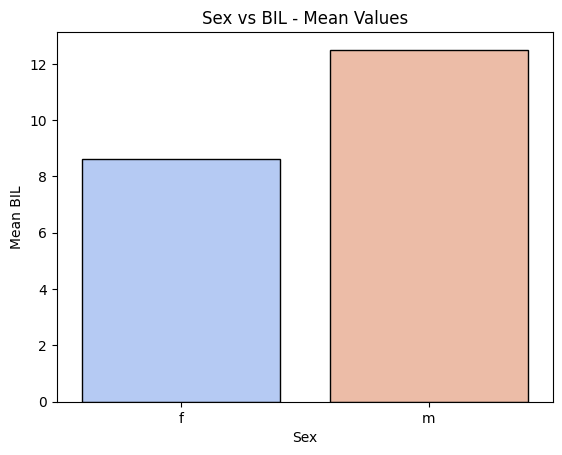


Categorical-Numerical statistics for Sex vs CHE:
     count      mean       std   min    25%    50%     75%    max
Sex                                                              
f    226.0  7.699646  1.781328  1.54  6.600  7.605  8.9375  12.80
m    363.0  8.517410  2.359752  1.42  7.135  8.620  9.9700  16.41


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



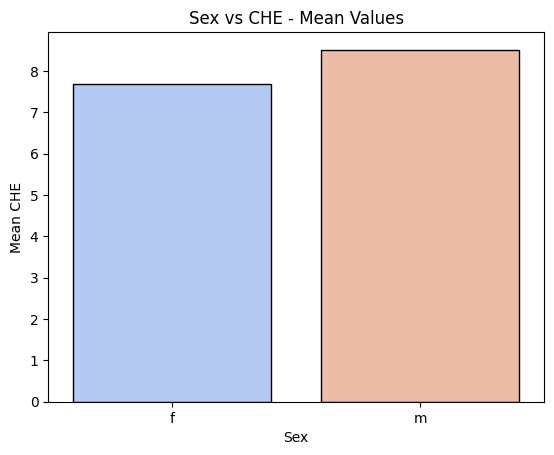


Categorical-Numerical statistics for Sex vs CHOL:
     count      mean       std   min   25%   50%     75%   max
Sex                                                           
f    226.0  5.434867  1.051667  2.86  4.68  5.33  6.0575  9.03
m    363.0  5.364242  1.175113  1.43  4.60  5.30  6.1350  9.67


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



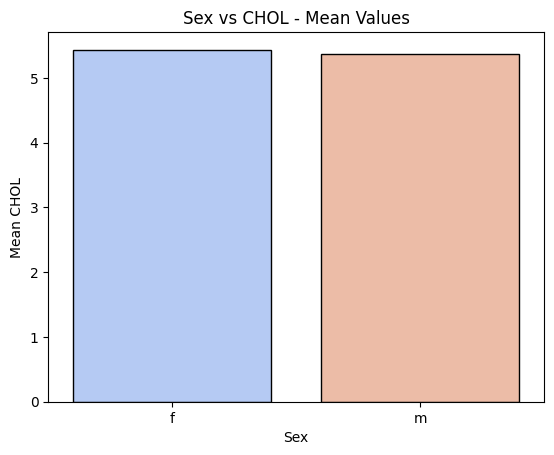

<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Categorical-Numerical statistics for Sex vs CREA:
     count       mean        std   min   25%   50%    75%     max
Sex                                                              
f    226.0  71.521681  30.536863  32.0  63.0  68.0  74.75   485.9
m    363.0  87.986777  59.083623   8.0  74.0  84.0  93.00  1079.1


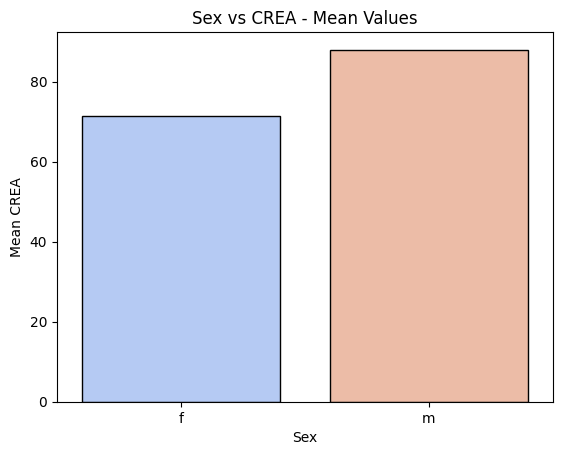


Categorical-Numerical statistics for Sex vs GGT:
     count       mean        std  min    25%   50%    75%    max
Sex                                                             
f    226.0  29.387168  51.578797  4.5  12.50  17.4  27.25  650.9
m    363.0  43.684298  55.294575  7.0  18.65  26.6  46.40  491.0


<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



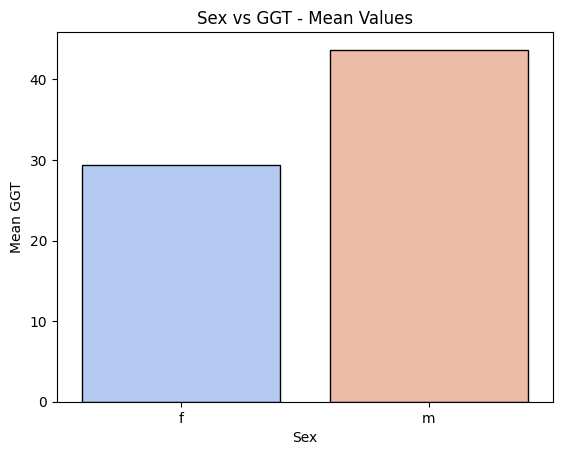

<ipython-input-38-8ee6e44180ca>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Categorical-Numerical statistics for Sex vs PROT:
     count       mean       std   min   25%    50%   75%   max
Sex                                                           
f    226.0  71.596903  4.959045  51.0  69.0  71.75  74.3  86.0
m    363.0  72.072727  5.576747  44.8  69.3  72.40  75.5  86.5


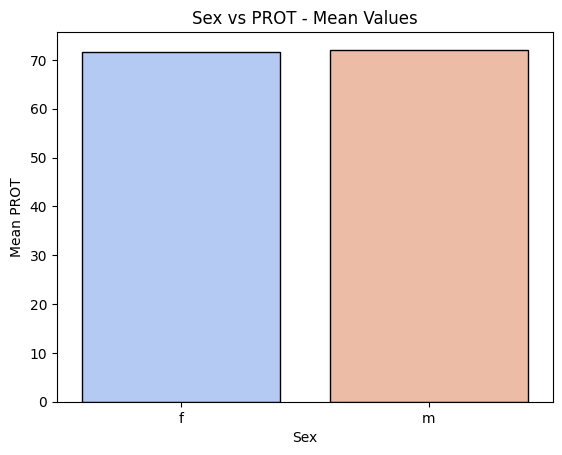

In [ ]:
categorical_numerical_tables = {}
for cat in categorical_cols:
    for num in numerical_cols:
        key = f"{cat} vs {num}"
        categorical_numerical_tables[key] = data_cleaned.groupby(cat)[num].describe()
        print(f"\nCategorical-Numerical statistics for {key}:")
        print(categorical_numerical_tables[key])

        grouped_data = data_cleaned.groupby(cat)[num].mean().reset_index()
        sns.barplot(data=grouped_data, x=cat, y=num, palette='coolwarm', edgecolor='black')
        plt.title(f"{key} - Mean Values")
        plt.xlabel(cat)
        plt.ylabel(f"Mean {num}")
        plt.show()


### **3-Way Contingency Tables**

In [ ]:
cont_table3 = {}

#### **Numerical-Numerical-Numerical (Correlation Matrix for 3 Variables)**

In [ ]:
print("\nNumerical-Numerical-Numerical (Correlation Matrix Subset):")
print(data_cleaned[numerical_cols].corr().iloc[:3, :3])


Numerical-Numerical-Numerical (Correlation Matrix Subset):
          Age       ALB      ALP
Age  1.000000 -0.191094  0.17772
ALB -0.191094  1.000000 -0.14612
ALP  0.177720 -0.146120  1.00000


#### **Categorical-Categorical-Numerical (Grouped Statistics)**

In [ ]:
categorical_categorical_numerical_tables = {}
for cat1 in categorical_cols:
    for cat2 in categorical_cols:
        for num in numerical_cols:
            if cat1 != cat2:
                key = f"{cat1} vs {cat2} vs {num}"
                categorical_categorical_numerical_tables[key] = data_cleaned.groupby([cat1, cat2])[num].describe()
                print(f"\nCategorical-Categorical-Numerical statistics for {key}:")
                print(categorical_categorical_numerical_tables[key])


Categorical-Categorical-Numerical statistics for Category vs Sex vs Age:
                            count       mean        std   min    25%   50%  \
Category               Sex                                                   
0=Blood Donor          f    209.0  47.196172   8.800939  32.0  41.00  48.0   
                       m    317.0  47.160883  10.158988  32.0  38.00  46.0   
0s=suspect Blood Donor f      1.0  59.000000        NaN  59.0  59.00  59.0   
                       m      6.0  57.333333  12.110601  47.0  48.25  52.0   
1=Hepatitis            f      4.0  46.250000  12.038134  33.0  39.00  45.5   
                       m     16.0  39.250000  10.761041  23.0  32.00  37.0   
2=Fibrosis             f      4.0  49.750000  15.413738  36.0  37.50  47.5   
                       m      8.0  49.625000  11.350739  29.0  44.50  51.0   
3=Cirrhosis            f      8.0  56.250000   7.905694  42.0  51.25  58.5   
                       m     16.0  53.312500   9.112034  39.0  45.75

### **Apply Row Profile, Column Profile, Relative Frequency, and Chi-square test on one 2D contingency table**

In [ ]:
selected_table = contingency_tables.get("Category vs Sex")
if selected_table is not None:
    print("\nRow Profile:")
    row_profile = selected_table.div(selected_table.sum(axis=1), axis=0)
    print(row_profile)

    print("\nColumn Profile:")
    column_profile = selected_table.div(selected_table.sum(axis=0), axis=1)
    print(column_profile)

    print("\nRelative Frequency:")
    relative_frequency = selected_table / selected_table.sum().sum()
    print(relative_frequency)

    chi2, p, dof, expected = chi2_contingency(selected_table)
    print("\nChi-Square Test Results:")
    print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
else:
    print("\nSelected contingency table not found.")


Row Profile:
Sex                            f         m
Category                                  
0=Blood Donor           0.397338  0.602662
0s=suspect Blood Donor  0.142857  0.857143
1=Hepatitis             0.200000  0.800000
2=Fibrosis              0.333333  0.666667
3=Cirrhosis             0.333333  0.666667

Column Profile:
Sex                            f         m
Category                                  
0=Blood Donor           0.924779  0.873278
0s=suspect Blood Donor  0.004425  0.016529
1=Hepatitis             0.017699  0.044077
2=Fibrosis              0.017699  0.022039
3=Cirrhosis             0.035398  0.044077

Relative Frequency:
Sex                            f         m
Category                                  
0=Blood Donor           0.354839  0.538200
0s=suspect Blood Donor  0.001698  0.010187
1=Hepatitis             0.006791  0.027165
2=Fibrosis              0.006791  0.013582
3=Cirrhosis             0.013582  0.027165

Chi-Square Test Results:
Chi2: 5.37104137456

### **Scatter Plot**

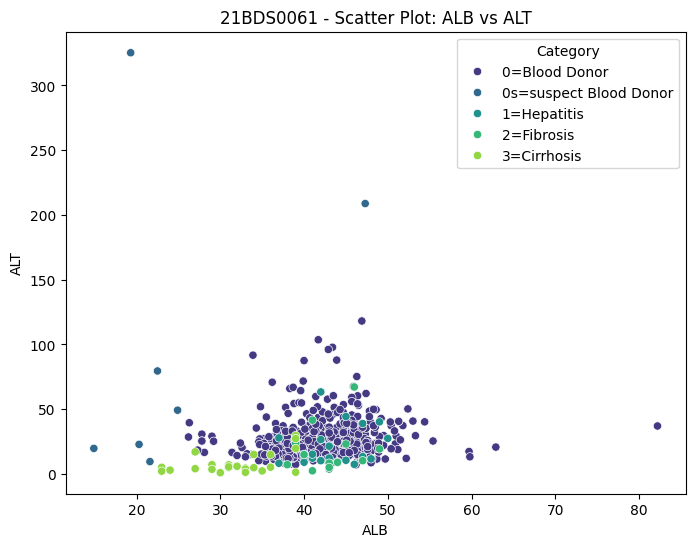

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = data_cleaned, x = "ALB", y = "ALT", hue = "Category", palette = "viridis")
plt.xlabel("ALB")
plt.ylabel("ALT")
plt.title("21BDS0061 - Scatter Plot: ALB vs ALT")
plt.legend(title="Category")
plt.show()

### **Scatter Plot for 3 Variables**

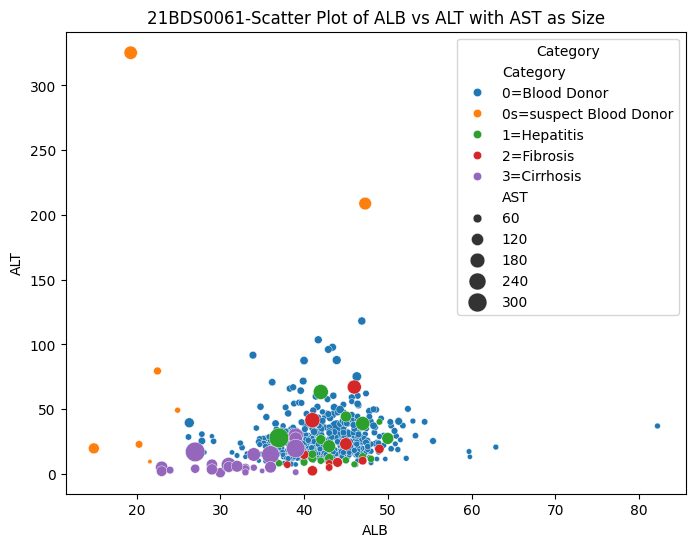

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_cleaned, x='ALB', y='ALT', hue='Category', size='AST', sizes=(10, 200))
plt.title("21BDS0061-Scatter Plot of ALB vs ALT with AST as Size")
plt.xlabel("ALB")
plt.ylabel("ALT")
plt.legend(title="Category")
plt.show()

### **3D Bar Plot**

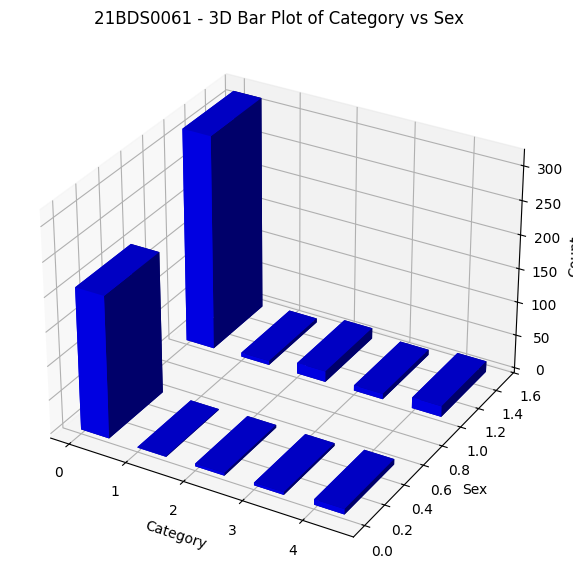

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(data_cleaned['Category'].unique()))
y = np.arange(len(data_cleaned['Sex'].unique()))
xpos, ypos = np.meshgrid(x, y, indexing="ij")
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

values = np.array([contingency_tables['Category vs Sex'].values.flatten()])
dz = values.flatten()

ax.bar3d(xpos, ypos, zpos, dx=0.5, dy=0.5, dz=dz, shade=True, color='b')
ax.set_xlabel('Category')
ax.set_ylabel('Sex')
ax.set_zlabel('Count')
ax.set_title('21BDS0061 - 3D Bar Plot of Category vs Sex')
plt.show()


### **2D Box Plot (One variable as Categorical)**

<ipython-input-41-5e01c137d63d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



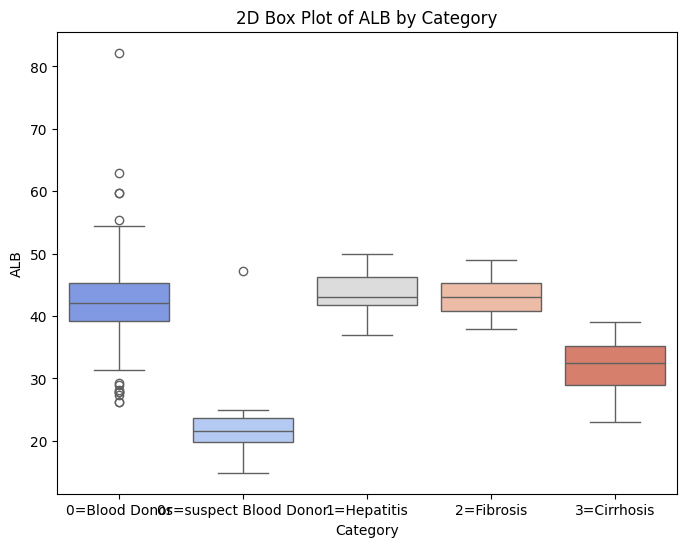

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_cleaned, x='Category', y='ALB', palette='coolwarm')
plt.title("2D Box Plot of ALB by Category")
plt.xlabel("Category")
plt.ylabel("ALB")
plt.show()


### **Sunray Plot**

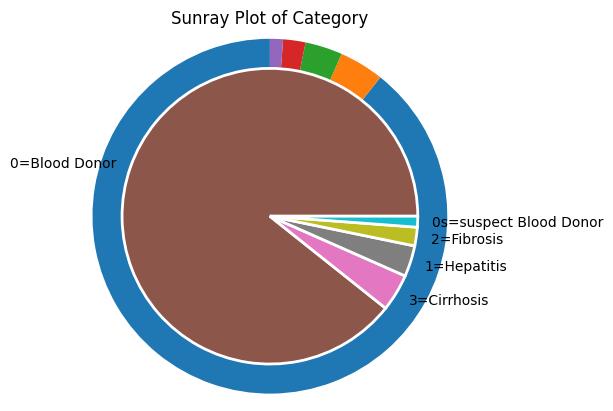

In [ ]:
def sunray_plot(data, category_col):
    freq = data[category_col].value_counts()
    pie, _ = plt.pie(freq, startangle=90, radius=1.2)
    plt.pie(freq, labels=freq.index, radius=1, wedgeprops={"linewidth": 2, "edgecolor": "white"})
    plt.title(f"Sunray Plot of {category_col}")
    plt.show()

sunray_plot(data_cleaned, 'Category')

# **MODULE 5**

## **Agglomerative Clustering and Dendograms**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
data_subset = data_cleaned.iloc[:10]

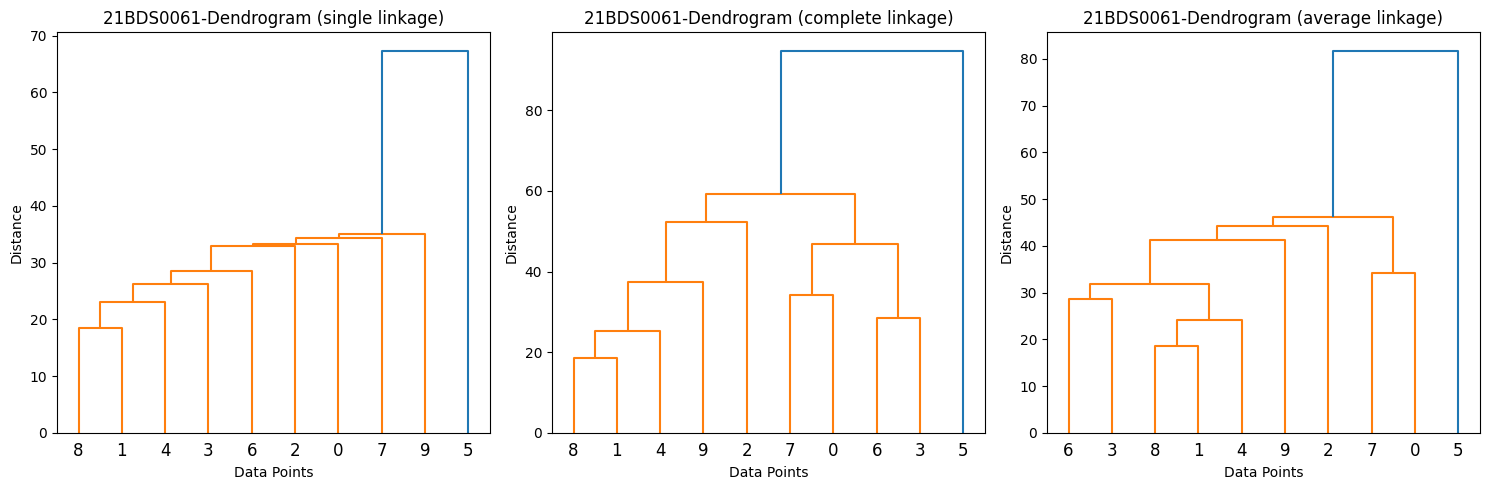

In [ ]:
linkage_methods = ['single', 'complete', 'average']
plt.figure(figsize=(15, 5))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(1, 3, i)
    linked = linkage(data_subset[numerical_cols], method=method)
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f"21BDS0061-Dendrogram ({method} linkage)")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()

## **K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans

### **Elbow Method to Find Optimal Number of Clusters**

In [ ]:
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_cleaned[numerical_cols])
    wcss.append(kmeans.inertia_)

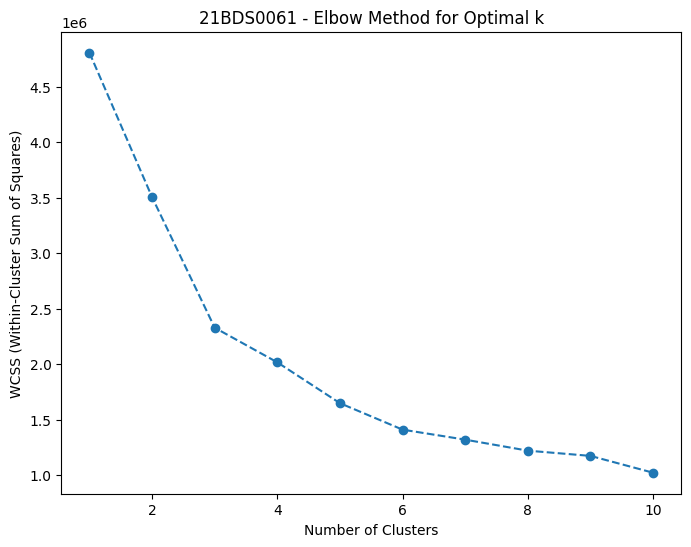

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('21BDS0061 - Elbow Method for Optimal k')
plt.show()


###  **K-Means Clustering with optimal clusters**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_cleaned[numerical_cols])
data_cleaned = data_cleaned.copy()
data_cleaned.loc[:, 'Cluster'] = kmeans.labels_

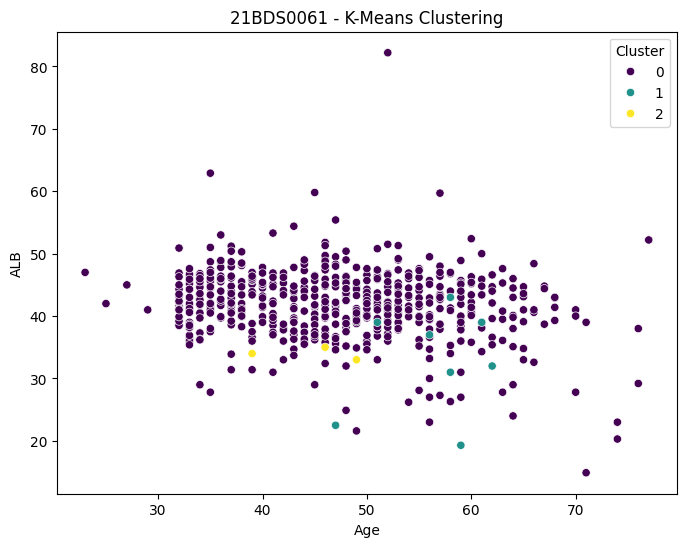

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned[numerical_cols[0]], y=data_cleaned[numerical_cols[1]], hue=data_cleaned['Cluster'], palette='viridis')
plt.title("21BDS0061 - K-Means Clustering")
plt.xlabel(numerical_cols[0])
plt.ylabel(numerical_cols[1])
plt.legend(title='Cluster')
plt.show()


## **DBSCAN Clustering**

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
epsilon = 0.5
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
data_cleaned.loc[:, 'DBSCAN_Cluster'] = dbscan.fit_predict(data_cleaned[numerical_cols])


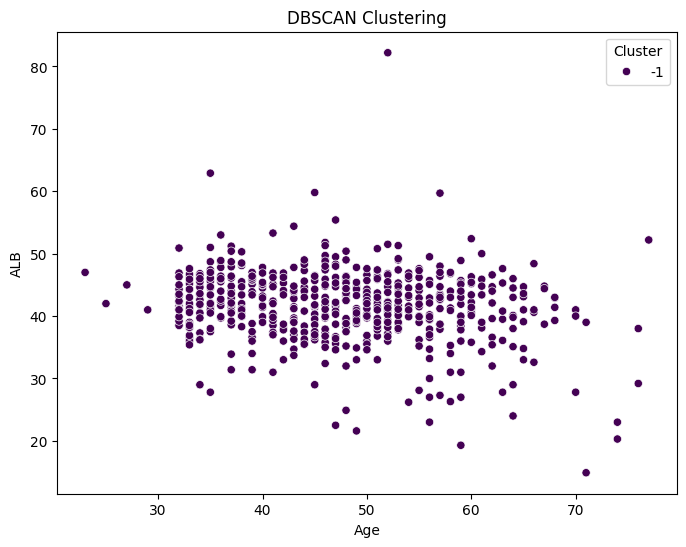

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned[numerical_cols[0]], y=data_cleaned[numerical_cols[1]], hue=data_cleaned['DBSCAN_Cluster'], palette='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel(numerical_cols[0])
plt.ylabel(numerical_cols[1])
plt.legend(title='Cluster')
plt.show()

In [ ]:
outliers = data_cleaned[data_cleaned['DBSCAN_Cluster'] == -1]
print("Identified Outliers:")
outliers.head(10)


Identified Outliers:


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Cluster,DBSCAN_Cluster
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,-1
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,-1
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,-1
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,-1
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,-1
5,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0,0,-1
6,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5,0,-1
7,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1,0,-1
8,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3,0,-1
9,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9,0,-1
